In [1]:
%matplotlib inline
import numpy as np
# import matplotlib.font_managermn as fm
import matplotlib.pyplot as plt
# 配置中文
# # 添加字体 
# fm.fontMnager.addfont('C:/Windows/Fonts/SimHei.ttf')
# 安装好字体后可以正常设置
plt.rcParams['font.sans-serif'] = ['SimHei'] # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是符号'-'显示为方块的问题

import pandas as pd
from py2neo import Graph, Node, Relationship
import re

d:\Anaconda_other\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
d:\Anaconda_other\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [43]:
# !pip install opencc-python-reimplemented

# 读取数据

In [44]:
df_comment = pd.read_csv("../../数据集/豆瓣电影数据集/豆瓣电影数据集/comments.csv", encoding='GB2312', encoding_errors='replace')
df_comment

,COMMENT_ID,USER_MD5,MOVIE_ID,CONTENT,VOTES,COMMENT_TIME,RATING
0,1359352573,0ab7e3efacd56983f16503572d2b9915,5113101,480p，画质不高，黑白，y,0,2018/9/5 19:42,2.0
1,1598245094,84dfd3f91dd85ea105bc74a4f0d7a067,5113101,毫无看点，黑白画质，一个男人孤独的心理情景历程，疯疯癫癫，没有任何恐怖的成分，这应该是剧情片吧.,0,2019/7/9 14:52,1.0
2,311937819,c9a47fd59b55967ceac07cac6d5f270c,3718526,上吊那�e超好笑，可惜最後�蟾娼��r的旁白大扣分,0,2010/11/5 22:15,3.0
3,262536568,35d3d5a52a7515c2ca6bb4d8e965149b,3718526,上海国际电影节观摩片,0,2010/6/20 2:12,NaN
4,376372407,54bfe88b57d8a3caea2637e62d182cf7,3718526,！,0,2011/4/9 22:10,NaN
...,...,...,...,...,...,...,...
1048570,1259139369,606cd7c6cf27a968ac60b157a1565547,1778500,最近就喜欢看这种淡如水但是叙事能力极强的电影,0,2017/10/19 19:36,5.0
1048571,1235082746,93a9326136e9c76c19f696adea483afc,1778500,海龟长寿，海龟能回到出生的地方，这些他都不能，但他遇见了他，一如他设想的关于海龟的美好爱情。,0,2017/8/26 23:30,3.0
1048572,1230370472,b1bb9c6513269c6b18d548e907149fe2,1778500,电影把切入点选在了修复“创伤”的过程中（导演的习惯性视角），两条故事线相辅相成，传递了尊重个...,0,2017/8/16 15:54,4.0
1048573,1213231114,723f661ee0e12d606a6bbd691cccd2de,1778500,夏天啊,0,2017/7/10 3:12,5.0


In [45]:
df_rating = pd.read_csv("../../数据集/豆瓣电影数据集/豆瓣电影数据集/ratings.csv", encoding='utf-8', encoding_errors='replace')
df_rating

,RATING_ID,USER_MD5,MOVIE_ID,RATING,RATING_TIME
0,1359352573,0ab7e3efacd56983f16503572d2b9915,5113101,2,2018-09-05 19:42:07
1,1598245094,84dfd3f91dd85ea105bc74a4f0d7a067,5113101,1,2019-07-09 14:52:07
2,311937819,c9a47fd59b55967ceac07cac6d5f270c,3718526,3,2010-11-05 22:15:44
3,457663846,18cbf971bdf17336056674bb8fad7ea2,3718526,4,2011-11-14 22:31:02
4,313277849,47e69de0d68e6a4db159bc29301caece,3718526,4,2010-11-09 12:41:11
...,...,...,...,...,...
4169415,1402192514,517cd1ba10c6bf42465184808ec80c1f,26914297,5,2018-07-08 17:48:09
4169416,1131394883,9b03a9f6953b06611e3352a889ecdfa2,26914297,4,2017-01-03 17:55:35
4169417,1565118781,4f696ad30cec6601ca49dfc2281985f3,26914297,3,2018-12-10 20:09:20
4169418,1888955067,9b32c4b5f73092083e23669ea6731b86,26914297,4,2019-08-03 14:39:02


In [46]:
df_movies = pd.read_csv("../../数据集/豆瓣电影数据集/豆瓣电影数据集/movies.csv")
df_movies

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df_mv = df_movies.copy()

# 将指定列的数据以'/'为分隔符拆分并转化为列表
df_mv['ACTORS'] = df_movies['ACTORS'].str.split('/')
df_mv['DIRECTORS'] = df_movies['DIRECTORS'].str.split('/')
df_mv['GENRES'] = df_movies['GENRES'].str.split('/')
df_mv['LANGUAGES'] = df_movies['LANGUAGES'].str.split('/')
df_mv['REGIONS'] = df_movies['REGIONS'].str.split('/')

# 删除NAME列中结尾的" - 电影"
df_mv['NAME'] = df_mv['NAME'].str.replace(' - 电影$', '', regex=True)

# 删除七列字段中数据为空的行
df_mv = df_mv[['MOVIE_ID','NAME', 'ACTORS', 'DIRECTORS', 'GENRES', 'LANGUAGES', 'REGIONS']].fillna('')
# df_mv.reset_index(drop=True, inplace=True) # 重新排序索引

# 由于部分类型以繁体字形式出现且有现成的类型与之对应，因此考虑统一格式
df_mv['GENRES'] = df_mv['GENRES'].apply(lambda x: ['剧情' if genre == '劇情 Drama' 
                                       else '惊悚' if genre in ['驚悚 Thriller', '惊栗']
                                       else '悬疑' if genre in ['懸疑 Mystery', '悬念']
                                       else '真人秀' if genre == 'Reality-TV'
                                       else '喜剧' if genre in ['喜劇 Comedy', 'Comedy']
                                       else '传记' if genre == '傳記 Biography'
                                       else '历史' if genre == '歷史 History'
                                       else '动作' if genre == '動作 Action'
                                       else '成人' if genre == 'Adult'
                                       else '动画' if genre == '動畫 Animation'
                                       else '爱情' if genre == '愛情 Romance'
                                       else '音乐' if genre == '音樂 Music'
                                       else '儿童' if genre == '兒童 Kids'
                                       else '纪录片' if genre in ['紀錄片 Documentary', '记录']
                                       else genre for genre in x])

df_mv

,MOVIE_ID,NAME,ACTORS,DIRECTORS,GENRES,LANGUAGES,REGIONS
0,26670818,情定河州,"[王博, 吴佳尼, 王姬, 高丽雯, 郭力行, 尹哲, 沈丹萍, 罗中旭, 臧金生, 罗刚,...",[尹哲],"[剧情, 爱情]",[汉语普通话],[中国大陆]
1,25815002,我不是李小龙,"[谷尚蔚, 吴孟达, 曾志伟, 杜海涛]",[洪金宝],"[动作, 爱情]",[汉语普通话],[中国大陆]
2,26392287,曼哈顿中国女孩,,,[剧情],"[英语 , 汉语普通话]","[中国大陆 , 美国]"
3,26695995,绿毛水怪,,"[梁栋, 吴国墉]",[爱情],[汉语普通话],[中国大陆]
4,26392292,为了祖国,,,"[剧情, 历史]","[汉语普通话 , 韩语 , 日语]","[中国大陆 , 韩国]"
...,...,...,...,...,...,...,...
140497,5108106,Pretty Boy and Rosa,,,[],,
140498,5108082,番茄杀手,,,[],,
140499,5108078,Fast Track,"[基思·卡拉丹, 弗雷德·威廉森, 邓肯·雷格尔, 布兰迪·莱德福特, 塞巴斯蒂安·斯宾赛,...",[T·J·斯科特],"[剧情, 动作]",[英语],[美国]
140500,5108060,7-9-13,,,[喜剧],[丹麦语],[丹麦]


# 数据处理与整合

In [ ]:
# 清理乱码
def clean_text(text):
    # 保留只包含英文、数字、中文字符的文本，删除其他字符
    cleaned_text = re.sub(r'[^\x00-\x7F\u4e00-\u9fa5\s\.。,，!！?？;；:：……(){}[\]<>"]+', '', str(text))
    cleaned_text = cleaned_text.replace('\n', '')
    return cleaned_text

# 对CONTENT列中的每一行应用清理函数
df_comment['CONTENT'] = df_comment['CONTENT'].apply(clean_text)
df_comment

,COMMENT_ID,USER_MD5,MOVIE_ID,CONTENT,VOTES,COMMENT_TIME,RATING
0,1359352573,0ab7e3efacd56983f16503572d2b9915,5113101,480p，画质不高，黑白，y,0,2018/9/5 19:42,2.0
1,1598245094,84dfd3f91dd85ea105bc74a4f0d7a067,5113101,毫无看点，黑白画质，一个男人孤独的心理情景历程，疯疯癫癫，没有任何恐怖的成分，这应该是剧情片吧.,0,2019/7/9 14:52,1.0
2,311937819,c9a47fd59b55967ceac07cac6d5f270c,3718526,上吊那e超好笑，可惜最後蟾娼r的旁白大扣分,0,2010/11/5 22:15,3.0
3,262536568,35d3d5a52a7515c2ca6bb4d8e965149b,3718526,上海国际电影节观摩片,0,2010/6/20 2:12,NaN
4,376372407,54bfe88b57d8a3caea2637e62d182cf7,3718526,！,0,2011/4/9 22:10,NaN
...,...,...,...,...,...,...,...
1048570,1259139369,606cd7c6cf27a968ac60b157a1565547,1778500,最近就喜欢看这种淡如水但是叙事能力极强的电影,0,2017/10/19 19:36,5.0
1048571,1235082746,93a9326136e9c76c19f696adea483afc,1778500,海龟长寿，海龟能回到出生的地方，这些他都不能，但他遇见了他，一如他设想的关于海龟的美好爱情。,0,2017/8/26 23:30,3.0
1048572,1230370472,b1bb9c6513269c6b18d548e907149fe2,1778500,电影把切入点选在了修复创伤的过程中导演的习惯性视角，两条故事线相辅相成，传递了尊重个体摈弃偏...,0,2017/8/16 15:54,4.0
1048573,1213231114,723f661ee0e12d606a6bbd691cccd2de,1778500,夏天啊,0,2017/7/10 3:12,5.0


## 实体信息统计

In [ ]:
df_com = pd.DataFrame({
    'entity':'COMMENT',
    'state': ['COMMENT_ID', 'MOVIE_ID', 'USER_MD5'],
    'Unique_Count': [df_comment['COMMENT_ID'].nunique(), df_comment['MOVIE_ID'].nunique(), df_comment['USER_MD5'].nunique()]
})

df_rat = pd.DataFrame({
    'entity':'RATING',
    'state': ['RATING_ID', 'MOVIE_ID', 'USER_MD5'],
    'Unique_Count': [df_rating['RATING_ID'].nunique(), df_rating['MOVIE_ID'].nunique(), df_rating['USER_MD5'].nunique()]
})

pd.concat([df_com, df_rat], ignore_index=True)

,entity,state,Unique_Count
0,COMMENT,COMMENT_ID,1048575
1,COMMENT,MOVIE_ID,21358
2,COMMENT,USER_MD5,278296
3,RATING,RATING_ID,4169420
4,RATING,MOVIE_ID,68471
5,RATING,USER_MD5,600384


## 数据集连接

In [ ]:
df_rat_com = pd.merge(df_rating, df_comment[['COMMENT_ID','USER_MD5', 'MOVIE_ID', 'CONTENT', 'COMMENT_TIME']], 
         left_on=['MOVIE_ID', 'USER_MD5'], right_on=['MOVIE_ID', 'USER_MD5'], 
         how='outer')
df_all = pd.merge(df_rat_com, df_mv,
                  on='MOVIE_ID',
                  how='left'
                  )
df_all.fillna('')

,RATING_ID,USER_MD5,MOVIE_ID,RATING,RATING_TIME,COMMENT_ID,CONTENT,COMMENT_TIME,NAME,ACTORS,DIRECTORS,GENRES,LANGUAGES,REGIONS
0,1941951607.0,018b88b05ec053e03acf97920e641115,1291544,5.0,2019-09-06 20:19:04,,,,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]"
1,1940095902.0,0617937403be10c1b6962686e97198b5,1291544,5.0,2019-09-05 08:44:38,,,,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]"
2,1941972397.0,08723142276d403448980d73b1eb6e78,1291544,4.0,2019-09-06 20:40:57,,,,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]"
3,1940079495.0,0ac1940db193217a5351d957ac06e7e1,1291544,4.0,2019-09-05 08:16:52,,,,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]"
4,1938949107.0,0ae3d72e2c2164f5060b17226b6f5710,1291544,5.0,2019-09-04 10:00:22,,,,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230496,1917903830.0,8e29154e90cfea1e5a291815a81bdc6f,34782320,3.0,2019-08-20 18:57:42,,,,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆]
4230497,1920864146.0,a3911cd0925a298a8f6c23fd73240b20,34782320,1.0,2019-08-22 20:44:35,,,,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆]
4230498,1916191002.0,a8dec3dc19b0a730d99e1affe5bce64f,34782320,1.0,2019-08-19 16:42:50,,,,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆]
4230499,1915867721.0,c57f355b1b45db04d2a2a1f7f8b5b083,34782320,3.0,2019-08-19 12:47:06,,,,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆]


In [ ]:
# 定义一个函数来检查文本中的繁体字
def contains_traditional_characters(text):
    if pd.isna(text):  # 如果是缺失值，则返回 False
        return False
    # 繁体字的Unicode范围
    return any('\u4E00' <= char <= '\u9FFF' or '\u3400' <= char <= '\u4DBF' or '\U00020000' <= char <= '\U0002A6DF' for char in text)
df_all[df_all['CONTENT'].apply(contains_traditional_characters)]
# contains_traditional_characters('媽媽')

,RATING_ID,USER_MD5,MOVIE_ID,RATING,RATING_TIME,COMMENT_ID,CONTENT,COMMENT_TIME,NAME,ACTORS,DIRECTORS,GENRES,LANGUAGES,REGIONS
120,3.993668e+08,01837ef46151a02258ac435eda10b89e,1291545,4.0,2011-06-05 17:01:32,3.993668e+08,命运残酷的折磨着人。为了离开艾许镇 我用尽一切努力…心爱的人却跟那里的废物订了婚。人有必须奋...,2011/6/5 17:01,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普, 杰西卡·兰格, 海伦娜·伯翰·卡特...",[蒂姆·波顿],"[剧情, 家庭, 奇幻, 冒险]","[英语 , 法语 , 俄语 , 粤语 , 汉语普通话]",[美国]
121,2.238914e+08,033a4b5ed6ab9f1d29703ca7e61780e3,1291545,5.0,2010-03-02 20:18:50,2.238914e+08,泪流满面……太感人了 相信你所相信的 爱你所爱的！父爱的伟大。,2010/3/2 20:18,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普, 杰西卡·兰格, 海伦娜·伯翰·卡特...",[蒂姆·波顿],"[剧情, 家庭, 奇幻, 冒险]","[英语 , 法语 , 俄语 , 粤语 , 汉语普通话]",[美国]
122,1.498138e+08,047f3aceb8697e4a36d666ab2c15bf9c,1291545,5.0,2009-08-17 02:18:54,1.498138e+08,非常非常美丽的童话。 那些不被理解的故事让我很揪心。最后他们终于齐齐的到来了。 有些时...,2009/8/17 2:18,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普, 杰西卡·兰格, 海伦娜·伯翰·卡特...",[蒂姆·波顿],"[剧情, 家庭, 奇幻, 冒险]","[英语 , 法语 , 俄语 , 粤语 , 汉语普通话]",[美国]
123,8.577995e+08,06707b00e252f43beff40d6b5df3b22a,1291545,2.0,2017-09-17 00:59:58,8.577995e+08,就。。。并没有环游全世界啊。。。一直围绕在艾许镇周边。。。而且一点都不冒险。。。并不是多么有...,2017/9/17 0:59,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普, 杰西卡·兰格, 海伦娜·伯翰·卡特...",[蒂姆·波顿],"[剧情, 家庭, 奇幻, 冒险]","[英语 , 法语 , 俄语 , 粤语 , 汉语普通话]",[美国]
124,1.842315e+08,0a33108ef21d1a695a01a5f114c6c090,1291545,3.0,2012-04-24 12:57:08,1.842315e+08,真亦好，幻亦好，也算给平淡的人生添了些梦幻色彩，激情不断幻想不断。突然让我想起了去武汉的火车...,2012/4/24 12:57,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普, 杰西卡·兰格, 海伦娜·伯翰·卡特...",[蒂姆·波顿],"[剧情, 家庭, 奇幻, 冒险]","[英语 , 法语 , 俄语 , 粤语 , 汉语普通话]",[美国]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230422,1.897363e+09,f7853858370ec330040dc76abb70de3e,34779698,1.0,2019-08-09 00:22:34,1.897363e+09,尴尬，一个白人都说中文，你个说普通话的黄皮肤非要中英双语,2019/8/9 0:22,星际流浪,"[菊麟, 肖轶腾, 高梓刚, 白超]",[迟成],[科幻],[汉语普通话],[中国大陆]
4230423,1.934546e+09,fa2b0581c5a06f2b5964efec3a6fbbfa,34779698,1.0,2019-08-31 23:53:14,1.934546e+09,直接扒超时空传输啊……简直了！太那个了！,2019/8/31 23:53,星际流浪,"[菊麟, 肖轶腾, 高梓刚, 白超]",[迟成],[科幻],[汉语普通话],[中国大陆]
4230424,1.900321e+09,fd1a2bc2309f5f403bc37f519a1b8881,34779698,3.0,2019-08-10 15:44:27,1.900321e+09,时间不断重复，一个小时内的事情一次又一次上映，随着死亡次数的增加，越来越多的人有了上一次的记...,2019/8/10 15:44,星际流浪,"[菊麟, 肖轶腾, 高梓刚, 白超]",[迟成],[科幻],[汉语普通话],[中国大陆]
4230479,1.922475e+09,1421f1baef085fe10490b1779579ba2a,34781689,4.0,2019-08-23 22:30:34,1.922475e+09,好想回西区看戏。。。,2019/8/23 22:30,长靴皇后,[基利安·唐纳利],,[歌舞],[英语],[英国]


In [ ]:
from opencc import OpenCC
import jieba
import re

# 创建 OpenCC 转换器实例
cc = OpenCC('t2s')  # t2s: 繁体到简体的转换
# 定义一个函数来转换繁体字为简体字
def convert_to_simplified(text):
    if pd.isna(text):  # 如果是缺失值，则返回原始值
        return text
    return cc.convert(text)

df_all['CONTENT'] = df_all['CONTENT'].apply(convert_to_simplified)

stop_words = set()
with open('../stopwords_full.txt', 'r', encoding='utf-8') as f:
    stop_words = set(f.read().splitlines())

# 定义一个函数进行分词和去停用词
def tokenize_and_remove_stopwords(text):
    if not isinstance(text, str):  # 确保 text 是字符串
        return ''
    words = jieba.cut(text)
    return ' '.join([word for word in words if word not in stop_words])

# 对 CONTENT 列应用处理
df_all['TOKENIZED_CONTENT'] = df_all['CONTENT'].apply(tokenize_and_remove_stopwords)

# 删除 TOKENIZED_CONTENT 列中以单独的英文字母出现的内容
df_all['TOKENIZED_CONTENT'] = df_all['TOKENIZED_CONTENT'].apply(
    lambda x: ' '.join(word for word in x.split() if not re.match(r'^[a-zA-Z]$', word))
)

df_all = df_all.dropna(subset=['NAME'])

df_all

,RATING_ID,USER_MD5,MOVIE_ID,RATING,RATING_TIME,COMMENT_ID,CONTENT,COMMENT_TIME,NAME,ACTORS,DIRECTORS,GENRES,LANGUAGES,REGIONS,TOKENIZED_CONTENT
0,1.941952e+09,018b88b05ec053e03acf97920e641115,1291544,5.0,2019-09-06 20:19:04,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",
1,1.940096e+09,0617937403be10c1b6962686e97198b5,1291544,5.0,2019-09-05 08:44:38,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",
2,1.941972e+09,08723142276d403448980d73b1eb6e78,1291544,4.0,2019-09-06 20:40:57,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",
3,1.940079e+09,0ac1940db193217a5351d957ac06e7e1,1291544,4.0,2019-09-05 08:16:52,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",
4,1.938949e+09,0ae3d72e2c2164f5060b17226b6f5710,1291544,5.0,2019-09-04 10:00:22,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230496,1.917904e+09,8e29154e90cfea1e5a291815a81bdc6f,34782320,3.0,2019-08-20 18:57:42,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],
4230497,1.920864e+09,a3911cd0925a298a8f6c23fd73240b20,34782320,1.0,2019-08-22 20:44:35,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],
4230498,1.916191e+09,a8dec3dc19b0a730d99e1affe5bce64f,34782320,1.0,2019-08-19 16:42:50,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],
4230499,1.915868e+09,c57f355b1b45db04d2a2a1f7f8b5b083,34782320,3.0,2019-08-19 12:47:06,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],


In [ ]:
df_all = df_all.dropna(subset=['NAME'])

In [ ]:
from collections import Counter
# 统计词频
word_list = ' '.join(df_all['TOKENIZED_CONTENT']).split()
word_freq = Counter(word_list)

# 将词频转换为 DataFrame
freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
freq_df

,Word,Frequency
141,电影,131935
28,故事,66603
21,太,57003
347,喜欢,55111
352,剧情,52216
...,...,...
226376,2014.0707,1
226378,无爱托尼,1
226379,个魂,1
226380,托尼多,1


# 探索性分析

In [ ]:
df_movies = df_all['NAME'].value_counts().reset_index()
df_movies

,NAME,count
0,呼啸山庄,1258
1,简爱,1142
2,哈姆雷特,1092
3,兄弟,1041
4,沉默,913
...,...,...
63739,我的冬日旅程,1
63740,真实的投稿黑暗映像 8,1
63741,交货,1
63742,泡妞四人组,1


In [ ]:
df_rt = df_all['RATING'].value_counts().reset_index()
df_rt

,RATING,count
0,3.0,1403939
1,4.0,1276110
2,5.0,641135
3,2.0,529528
4,1.0,318316


## 电影类型统计分析

In [ ]:
# 数据处理
df_genres = df_all.explode('GENRES')
genre_counts = df_genres['GENRES'].value_counts().reset_index()
# 将结果重命名列
genre_counts.columns = ['GENRE', 'COUNT']

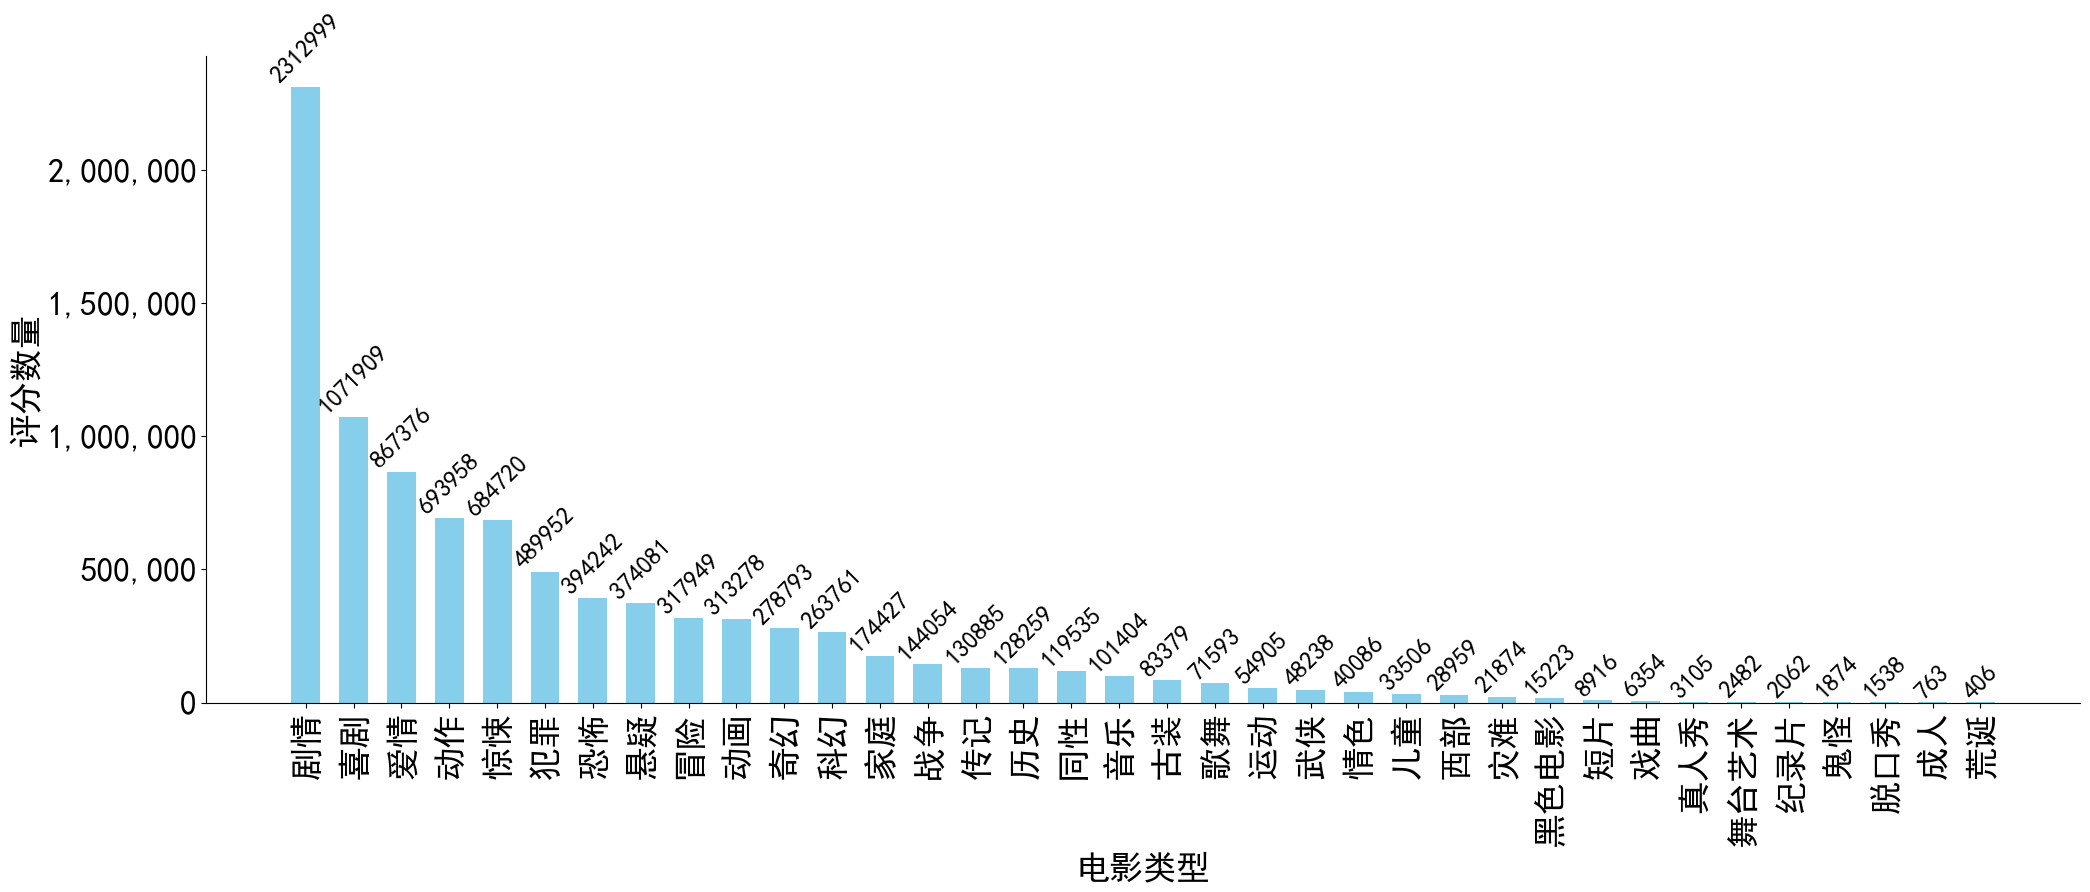

In [ ]:
from matplotlib.ticker import FuncFormatter
# 创建自定义格式化函数
def format_func(value, tick_number):
    return f'{int(value):,}'  # 以千位分隔符格式化数字
bar_width = 0.6  # 设置柱子的宽度
x = range(len(genre_counts))

# 绘制柱形图
plt.figure(figsize=(21, 9))
# 绘制柱形图，增加间距
bars = plt.bar([i for i in x], genre_counts['COUNT'], width=bar_width, color='skyblue')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 在柱形图上显示数字
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontsize=18, rotation=45)

# 设定自定义的纵坐标刻度格式
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
# plt.grid(linestyle="--")  # 设置背景网格线为虚线
# plt.title('电影类型评分数量', fontsize=28, fontweight='bold')
plt.xlabel('电影类型', fontsize=24)
plt.ylabel('评分数量', fontsize=24)
plt.xticks(x, genre_counts['GENRE'], rotation=90, fontsize=24)  # 设置x轴标签
plt.yticks(fontsize=24)
plt.tight_layout()  # 自动调整布局以适应标签
plt.show()

In [ ]:
country_genres_count = df_genres[['REGIONS', 'GENRES']].explode('REGIONS')
country_genres_count = country_genres_count[country_genres_count['REGIONS'] == '美国']
la_genres_count = country_genres_count['GENRES'].value_counts().reset_index()
la_genres_count.columns = ['GENRE', 'COUNT']
la_genres_count

,GENRE,COUNT
0,剧情,508855
1,喜剧,291415
2,惊悚,264788
3,爱情,208644
4,动作,187537
5,恐怖,154592
6,犯罪,150748
7,冒险,116793
8,科幻,110226
9,悬疑,87466


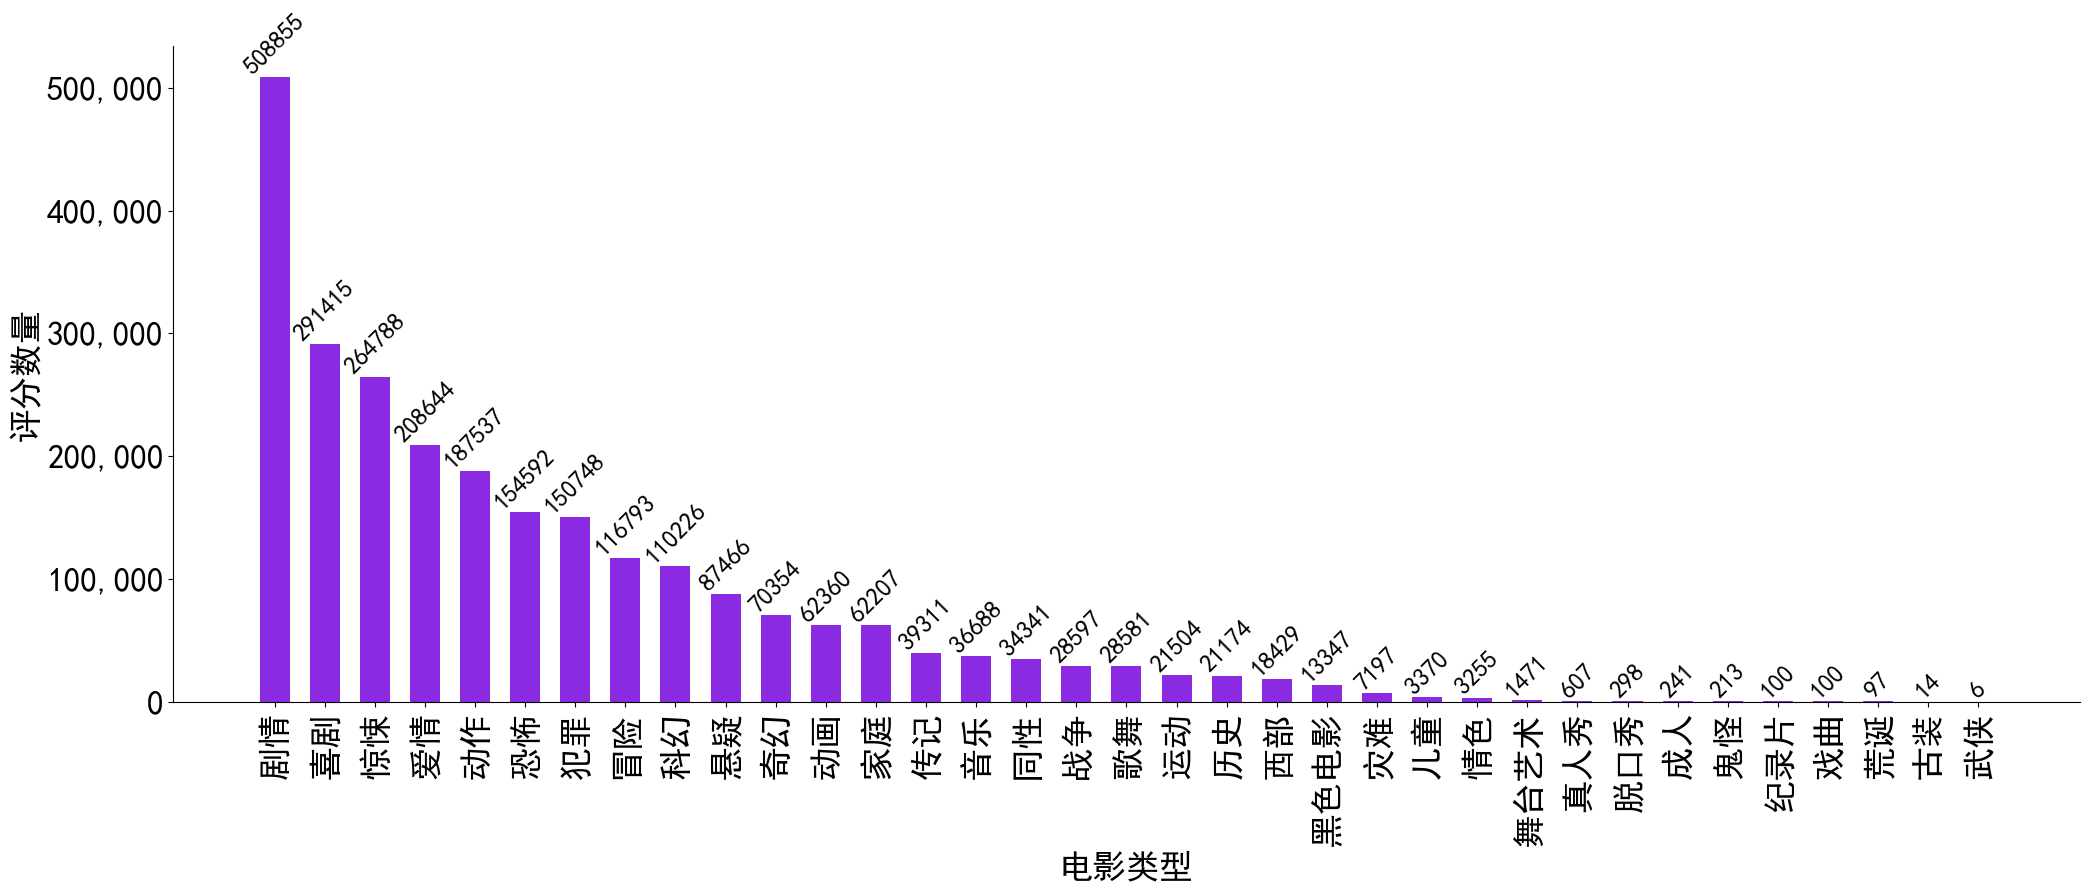

In [ ]:
from matplotlib.ticker import FuncFormatter
# 创建自定义格式化函数
def format_func(value, tick_number):
    return f'{int(value):,}'  # 以千位分隔符格式化数字
bar_width = 0.6  # 设置柱子的宽度
x = range(len(la_genres_count))

# 绘制柱形图
plt.figure(figsize=(21, 9))
# 绘制柱形图，增加间距
bars = plt.bar([i for i in x], la_genres_count['COUNT'], width=bar_width, color='blueviolet')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 在柱形图上显示数字
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontsize=18, rotation=45)

# 设定自定义的纵坐标刻度格式
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
# plt.grid(linestyle="--")  # 设置背景网格线为虚线
# plt.title('美国电影类型评分数量分布', fontsize=28, fontweight='bold')
plt.xlabel('电影类型', fontsize=24)
plt.ylabel('评分数量', fontsize=24)
plt.xticks(x, la_genres_count['GENRE'], rotation=90, fontsize=24)  # 设置x轴标签
plt.yticks(fontsize=24)
plt.tight_layout()  # 自动调整布局以适应标签
plt.show()

In [ ]:
genre_counts

,GENRE,COUNT
0,剧情,2278606
1,喜剧,1058037
2,爱情,854742
3,动作,685894
4,惊悚,676295
5,犯罪,483972
6,恐怖,387863
7,悬疑,369704
8,冒险,314143
9,动画,309138


## 电影制片地区统计分析

In [ ]:
# 数据处理
df_regions = df_all.explode('REGIONS')
df_regions['REGIONS'] = df_regions['REGIONS'].replace('\s','',regex=True)
df_regions['REGIONS'] = df_regions['REGIONS'].replace({'台湾': '中国台湾'})
regions_counts = df_regions['REGIONS'].value_counts().reset_index()
# 将结果重命名列
regions_counts.columns = ['REGION', 'COUNT']
# 删除 REGION 列为空的行
regions_counts = regions_counts.drop(index=9)
regions_counts = regions_counts.value_counts().reset_index()

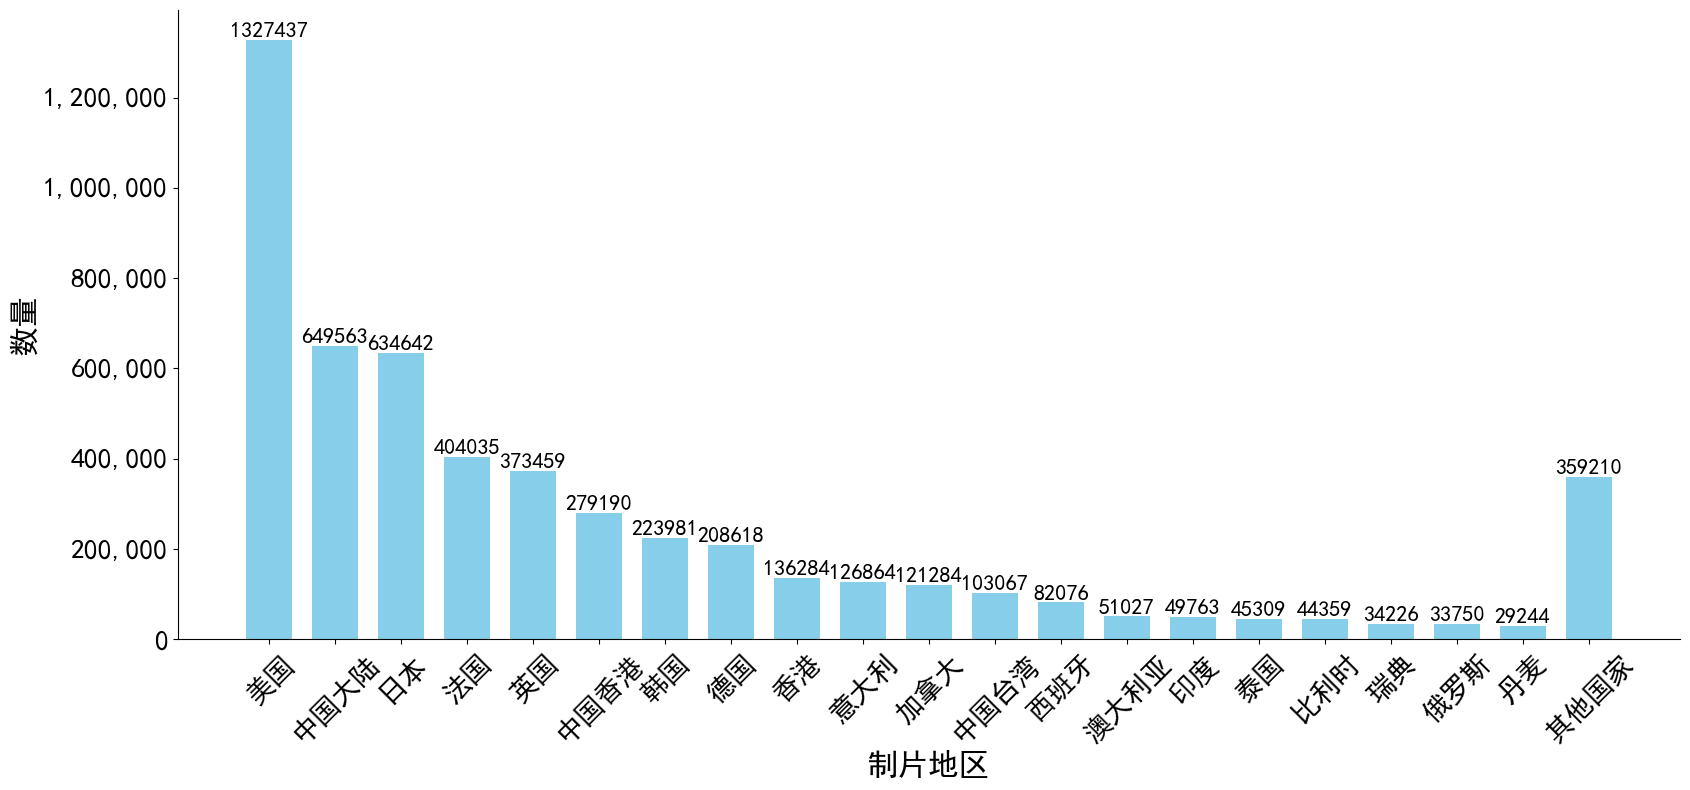

In [ ]:
# 先进行排序，选取前20
top_20 = regions_counts.nlargest(20, 'COUNT')

# 计算其他国家的总和
other_count = regions_counts.loc[~regions_counts['REGION'].isin(top_20['REGION'])]['COUNT'].sum()

# 创建一个新的 DataFrame 包含前20个国家和"其他国家"
other_row = pd.DataFrame({'REGION': ['其他国家'], 'COUNT': [other_count]})
final_data = pd.concat([top_20, other_row], ignore_index=True)


# 自定义格式化函数
def format_func(value, tick_number):
    return f'{int(value):,}'  # 使用千位分隔符

# 绘图
plt.figure(figsize=(17, 8))
bars = plt.bar(final_data['REGION'], final_data['COUNT'], color='skyblue', width=0.7)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 在每个柱子上标注数值
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=16)

# 设置纵坐标格式
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# plt.grid(linestyle="--")  # 设置背景网格线为虚线
plt.xlabel('制片地区', fontsize=22)
plt.ylabel('数量', fontsize=22)
# plt.title('制片地区数量排名前20的国家', fontsize=26)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()  # 自动调整布局以防止标签重叠
plt.show()

## 速度与激情评分数据分析

C:\Users\jhc\AppData\Local\Temp\ipykernel_1600\2483307696.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['RATING_TIME'] = pd.to_datetime(filtered_df['RATING_TIME'])
C:\Users\jhc\AppData\Local\Temp\ipykernel_1600\2483307696.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['YEAR_MONTH'] = filtered_df['RATING_TIME'].dt.to_period('M').astype(str)


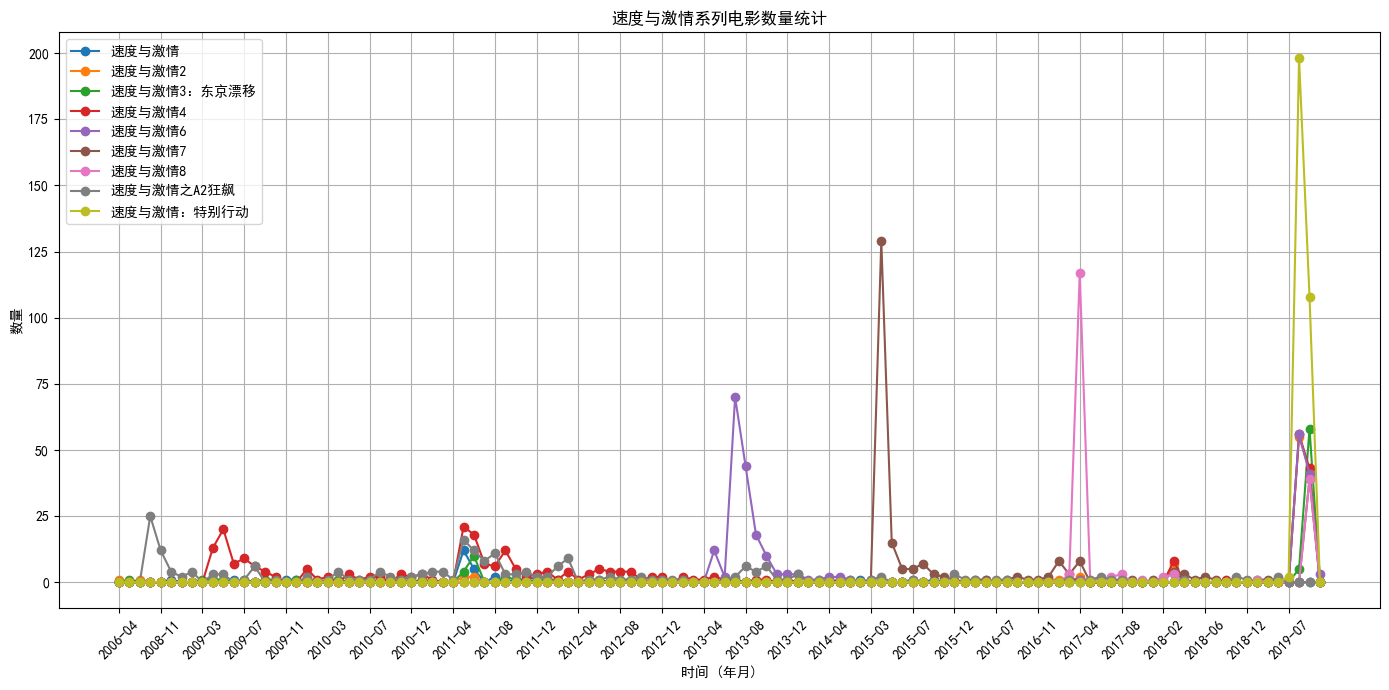

In [ ]:
filtered_df = df_all[df_all['NAME'].str.contains('速度与激情', na=False)]

# 转换RATING_TIME列为datetime格式
filtered_df['RATING_TIME'] = pd.to_datetime(filtered_df['RATING_TIME'])

# 提取年月信息
filtered_df['YEAR_MONTH'] = filtered_df['RATING_TIME'].dt.to_period('M').astype(str)

# 按NAME分组，并统计每个电影每个月的数量
monthly_counts = filtered_df.groupby(['NAME', 'YEAR_MONTH']).size().unstack(fill_value=0)

# 绘制所有电影的折线图
plt.figure(figsize=(14, 7))
for movie in monthly_counts.index:
    plt.plot(monthly_counts.columns, monthly_counts.loc[movie], marker='o', label=movie)

plt.title('速度与激情系列电影数量统计')
plt.xlabel('时间 (年月)')
plt.ylabel('数量')

# 设置横坐标的刻度，以4个月为单位
x_ticks = monthly_counts.columns[::4]  # 每4个月取一个刻度
plt.xticks(x_ticks, rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## 评分数据

In [ ]:
# 统计每个用户的 RATING_ID 和 COMMENT_ID 情况
user_stats = df_all.groupby('USER_MD5').agg(
    rating_count=('RATING_ID', lambda x: x.isnull().sum()),
    comment_count=('COMMENT_ID', lambda x: x.isnull().sum())
).reset_index()

# 统计 RATING_ID 为空的用户数量
users_with_no_rating = user_stats[user_stats['rating_count'] > 0]['USER_MD5'].nunique()

# 统计 COMMENT_ID 为空的用户数量
users_with_no_comment = user_stats[user_stats['comment_count'] > 0]['USER_MD5'].nunique()

# 统计 RATING_ID 和 COMMENT_ID 都不为空的用户数量
users_with_both_present = user_stats[(user_stats['rating_count'] == 0) & (user_stats['comment_count'] == 0)]['USER_MD5'].nunique()

# 输出结果
print(f"用户RATING_ID为空的数量: {users_with_no_rating}")
print(f"用户COMMENT_ID为空的数量: {users_with_no_comment}")
print(f"用户RATING_ID和COMMENT_ID都不为空的数量: {users_with_both_present}")

用户RATING_ID为空的数量: 29512
用户COMMENT_ID为空的数量: 525686
用户RATING_ID和COMMENT_ID都不为空的数量: 73827


In [ ]:
user_stats

,USER_MD5,rating_count,comment_count
0,00000d431c3ef737f7a2cc7d3cf2540a,0,15
1,00008d9fd119a18338f700e9f6b018d3,1,0
2,00008ef628c42d8089253c0906804c7e,0,14
3,0000907ad9784ed6c758550e6e443e4d,0,2
4,00009ed66bc8a8a867b7887ccedabba4,0,1
...,...,...,...
609351,ffff5bb919b23a534bf9858f64d1d4b7,0,3
609352,ffff66342d284e19b75ab76390268d74,0,2
609353,ffff875dc090c1109b3d37ce5b114075,0,1
609354,ffff9498af27bdb06c3e61452758fba5,0,9


In [ ]:
# 统计 RATING_ID 为空的数量
count_rating_not_null = df_all['RATING_ID'].isnull().sum()

# 统计 COMMENT_ID 为空的数量
count_comment_not_null = df_all['COMMENT_ID'].isnull().sum()

# 统计 RATING_ID 和 COMMENT_ID 都不为空的数量
count_both_not_null = df_all[df_all['RATING_ID'].notnull() & df_all['COMMENT_ID'].notnull()].shape[0]

# 输出结果
print(f"RATING_ID 为空的数量: {count_rating_not_null}")
print(f"COMMENT_ID 为空的数量: {count_comment_not_null}")
print(f"RATING_ID 和 COMMENT_ID 都不为空的数量: {count_both_not_null}")

RATING_ID 为空的数量: 61075
COMMENT_ID 为空的数量: 3181599
RATING_ID 和 COMMENT_ID 都不为空的数量: 987429


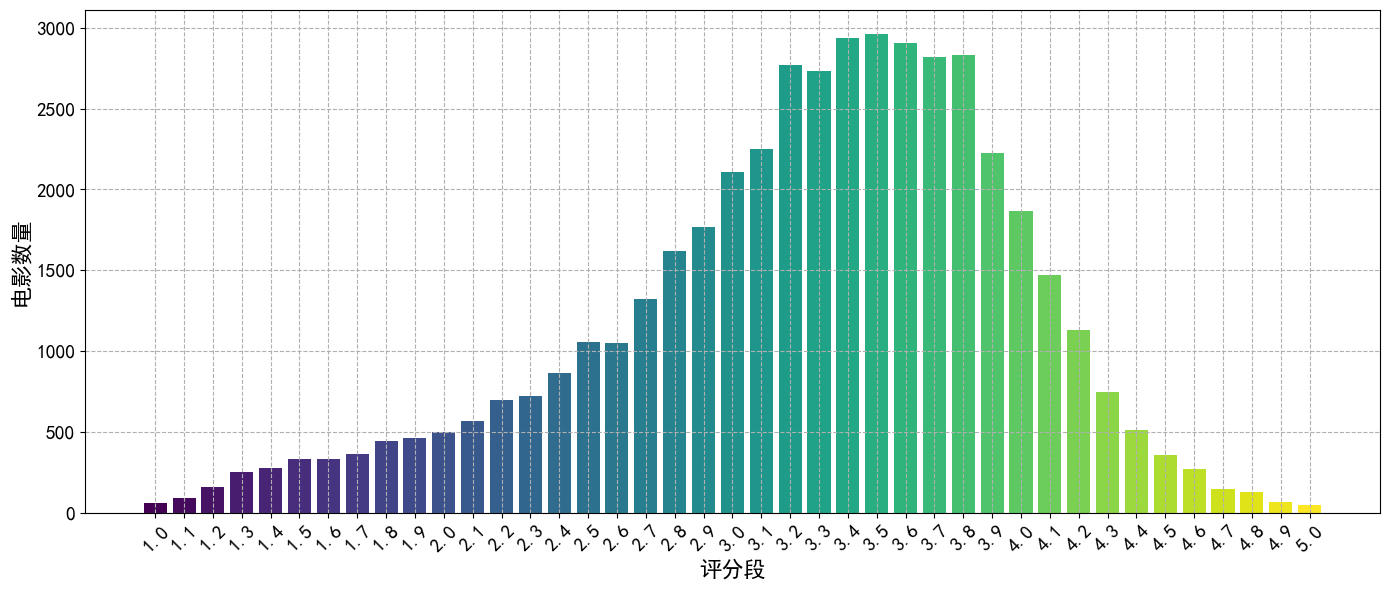

In [ ]:
# 统计每部电影的出现次数
movie_counts = df_all['NAME'].value_counts()

# 过滤出出现次数超过 5 的电影
popular_movies = movie_counts[movie_counts > 5].index

# 计算这些电影的平均分
average_ratings = df_all[df_all['NAME'].isin(popular_movies)].groupby('NAME')['RATING'].mean().round(1)

# 创建分数段，从 0 到 5，每 0.1 为一个间隔
bins = [i / 10 for i in range(10,52)]  # [0, 0.1, 0.2, ..., 5]
labels = [f'{i / 10:.1f}' for i in range(10,51)]  # ['0.0', '0.1', '0.2', ..., '5.0']

# 将评分分类到指定的分数段
average_ratings_category = pd.cut(average_ratings, bins=bins, labels=labels, right=False)

# 统计各分数段的电影数量
rating_counts = average_ratings_category.value_counts().sort_index()

# 生成颜色映射
colors = plt.cm.viridis(np.linspace(0, 1, len(rating_counts)))  # 使用 Viridis 颜色映射

# 绘制柱状图
plt.figure(figsize=(14, 6))  # 设置图像大小
plt.grid(linestyle="--")  # 设置背景网格线为虚线
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.xlabel('评分段', fontsize=16, fontweight='bold')
plt.ylabel('电影数量', fontsize=16, fontweight='bold')
# plt.title('不同评分段的电影数量统计', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=14, fontweight='bold')
# plt.xlim(left=0)
plt.yticks(fontsize=14)
plt.tight_layout()  # 调整布局以避免标签重叠

# # 添加数据标签
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom',fontsize=12, fontweight='bold')  # 显示数量

plt.show()


In [ ]:
score_cnt = 0
total_cnt = 0
for rating in [f'{i / 10:.1f}' for i in range(30, 40)]:
    score_cnt = score_cnt + rating_counts[rating]
for rating in [f'{i / 10:.1f}' for i in range(10, 50)]:
    total_cnt = total_cnt + rating_counts[rating]
score_cnt / total_cnt
# rating_counts['4.5']

0.5754766485919188

## 用户评分时间段分析

C:\Users\jhc\AppData\Local\Temp\ipykernel_1600\4108233811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['RATING_TIME'] = pd.to_datetime(df_all['RATING_TIME'])
C:\Users\jhc\AppData\Local\Temp\ipykernel_1600\4108233811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['COMMENT_TIME'] = pd.to_datetime(df_all['COMMENT_TIME'])
C:\Users\jhc\AppData\Local\Temp\ipykernel_1600\4108233811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

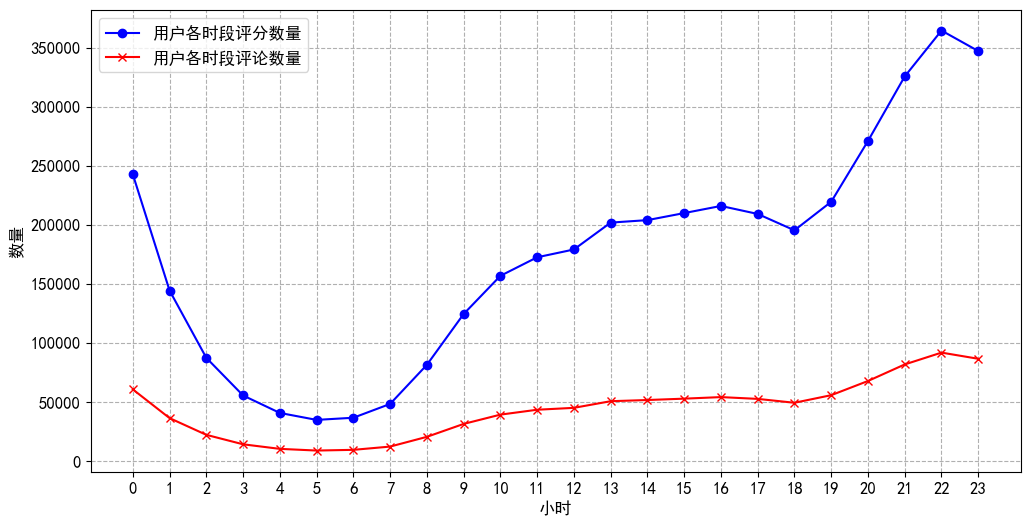

In [ ]:
df_all['RATING_TIME'] = pd.to_datetime(df_all['RATING_TIME'])
df_all['COMMENT_TIME'] = pd.to_datetime(df_all['COMMENT_TIME'])

# 提取小时数据
df_all['RATING_HOUR'] = df_all['RATING_TIME'].dt.hour
df_all['COMMENT_HOUR'] = df_all['COMMENT_TIME'].dt.hour

# 统计每个小时的数量
hourly_rating_counts = df_all['RATING_HOUR'].value_counts().sort_index()
hourly_comment_counts = df_all['COMMENT_HOUR'].value_counts().sort_index()

# 绘制折线图
plt.figure(figsize=(12, 6))

# 绘制评分数量的折线
plt.plot(hourly_rating_counts.index, hourly_rating_counts.values, marker='o', label="用户各时段评分数量", linewidth=1.5, color='blue')

# 绘制评论数量的折线
plt.plot(hourly_comment_counts.index, hourly_comment_counts.values, marker='x', label="用户各时段评论数量", linewidth=1.5, color='red')

# 设置图表标题和坐标标签
# plt.title('用户活跃时间分布', fontweight='bold', fontsize=14)
plt.xlabel('小时', fontweight='bold', fontsize=12)
plt.ylabel('数量', fontweight='bold', fontsize=12)
plt.xticks(range(24), fontsize=12)  # 设置X轴为0-23小时
plt.yticks(fontsize=12)
plt.grid(linestyle="--")  # 设置背景网格线为虚线
plt.legend(fontsize=12)
plt.show()


## 文本评论探索性分析

In [ ]:
df_all[df_all['RATING_ID'].isnull()]

C:\Users\jhc\AppData\Local\Temp\ipykernel_1600\1209286112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.drop('Hour',axis=1, inplace=True)


,RATING_ID,USER_MD5,MOVIE_ID,RATING,RATING_TIME,COMMENT_ID,CONTENT,COMMENT_TIME,NAME,ACTORS,DIRECTORS,GENRES,LANGUAGES,REGIONS,TOKENIZED_CONTENT
131,NaN,142cf4a2b5cba86fb28ea5000e1e1348,1291545,NaN,NaT,2.180827e+08,人生已经如此的艰难 有些故事就不要拆穿,2010/2/17 10:35,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普, 杰西卡·兰格, 海伦娜·伯翰·卡特...",[蒂姆·波顿],"[剧情, 家庭, 奇幻, 冒险]","[英语 , 法语 , 俄语 , 粤语 , 汉语普通话]",[美国],人生 艰难 故事 拆穿
161,NaN,35800909d666adc5cbe4994962af2433,1291545,NaN,NaT,7.673019e+07,不好意思我太容易感动了，我们可以据此分析得出蒂姆伯顿有某种情结,2008/12/2 21:02,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普, 杰西卡·兰格, 海伦娜·伯翰·卡特...",[蒂姆·波顿],"[剧情, 家庭, 奇幻, 冒险]","[英语 , 法语 , 俄语 , 粤语 , 汉语普通话]",[美国],不好意思 太 感动 分析 蒂姆 伯顿 某种 情结
169,NaN,400c90c32ca48cff84717f52a580c7b0,1291545,NaN,NaT,5.457805e+08,籍着父亲节的余热，重温了一遍big fish。正在经历着面临毕业，疼痛却如大地黄色般真实的这...,2012/6/18 21:43,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普, 杰西卡·兰格, 海伦娜·伯翰·卡特...",[蒂姆·波顿],"[剧情, 家庭, 奇幻, 冒险]","[英语 , 法语 , 俄语 , 粤语 , 汉语普通话]",[美国],籍 父亲节 余热 重温 一遍 big fish 经历 面临 毕业 疼痛 大地 黄色 般 真实...
238,NaN,8f9e91f1c7c1369671ca41afdfa0a84f,1291545,NaN,NaT,8.603221e+08,当我在生命中面对那些不总相信的人们，我总是想起Big Fish，我会想，那样的结局是存在的。...,2014/11/5 21:50,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普, 杰西卡·兰格, 海伦娜·伯翰·卡特...",[蒂姆·波顿],"[剧情, 家庭, 奇幻, 冒险]","[英语 , 法语 , 俄语 , 粤语 , 汉语普通话]",[美国],生命 中 面对 总 想起 Big Fish 我会 想 结局 发生 世上 事 真实 自然 地球 一隅
252,NaN,9d50cc1fcfd9c4ab90769a4eb30e3295,1291545,NaN,NaT,5.446913e+08,barely remember what's it talking about……,2012/6/16 2:29,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普, 杰西卡·兰格, 海伦娜·伯翰·卡特...",[蒂姆·波顿],"[剧情, 家庭, 奇幻, 冒险]","[英语 , 法语 , 俄语 , 粤语 , 汉语普通话]",[美国],barely remember talking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4229959,NaN,88635a557a206b705ffd5e4781d6d399,34676447,NaN,NaT,1.921311e+09,She's Marrying Steve,2019/8/23 2:20,她要嫁给史蒂夫,[珍娜·劳伦索],,[同性],[英语],[美国],She Marrying Steve
4229963,NaN,a7e574af23fefdb5f4b190ac90d3674f,34676447,NaN,NaT,1.880185e+09,是要多抖M才会去参加前女友的婚礼,2019/7/28 22:47,她要嫁给史蒂夫,[珍娜·劳伦索],,[同性],[英语],[美国],抖 参加 前女友 婚礼
4229999,NaN,8e211c0be6cf07992d3969c42a185929,34679911,NaN,NaT,1.938807e+09,睡醒离场去palazzo del casin里happy shitting了,2019/9/4 3:55,白色上的白色,"[阿尔佛莱德·卡斯特罗, 拉尔斯·鲁道夫]",[提奥·考特],[剧情],"[西班牙语 , 英语]","[智利 , 法国 , 德国 , 西班牙]",睡醒 离场 palazzo del casin 里 happy shitting
4230336,NaN,43d09a9d84caa76fbcd492bff619ab10,34779698,NaN,NaT,1.896905e+09,这部片子还没看，但我知道这部片子的导演是我情敌，他的老婆长得非常美，是我的女神，我在网上查出...,2019/8/8 19:49,星际流浪,"[菊麟, 肖轶腾, 高梓刚, 白超]",[迟成],[科幻],[汉语普通话],[中国大陆],这部 片子 没 这部 片子 导演 情敌 老婆 长得 美 女神 网上 查出 微信 四年 没加


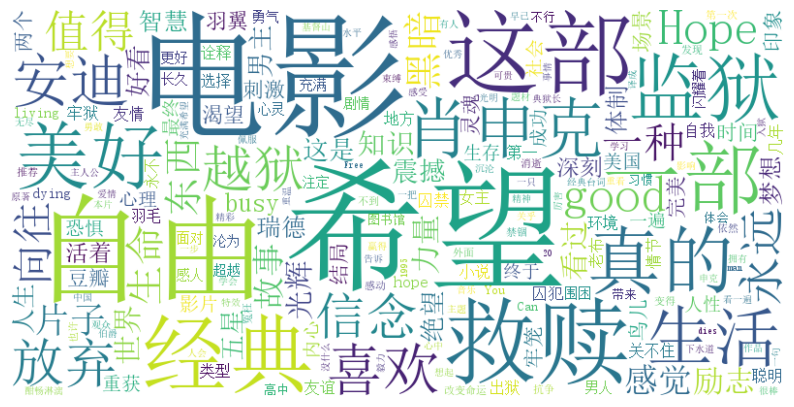

In [ ]:
from wordcloud import WordCloud
from collections import Counter

df_content = df_all[['NAME', 'RATING', 'RATING_TIME', 'CONTENT', 'TOKENIZED_CONTENT']].dropna()
# cnt_movie = df_content['NAME'].value_counts().reset_index()
# cnt_movie[20:30]

filtered_content = df_content[df_content['NAME'] == '肖申克的救赎']['TOKENIZED_CONTENT']

# 将TOKENIZED_CONTENT合并成一个字符串
text = ' '.join(filtered_content)

# 过滤掉单个字
filtered_words = [word for word in text.split() if len(word) > 1]  # 只保留长度大于1的词

# 统计词频
word_counts = Counter(filtered_words)

# 创建词云，指定支持中文的字体
wordcloud = WordCloud(font_path='C:/Windows/Fonts/simsun.ttc',  # 替换为你的字体路径
                      width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# 显示词云图
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不显示坐标轴
plt.show()

# C:/Windows/Fonts/simsun.ttc

C:\Users\jhc\AppData\Local\Temp\ipykernel_1600\2584092939.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


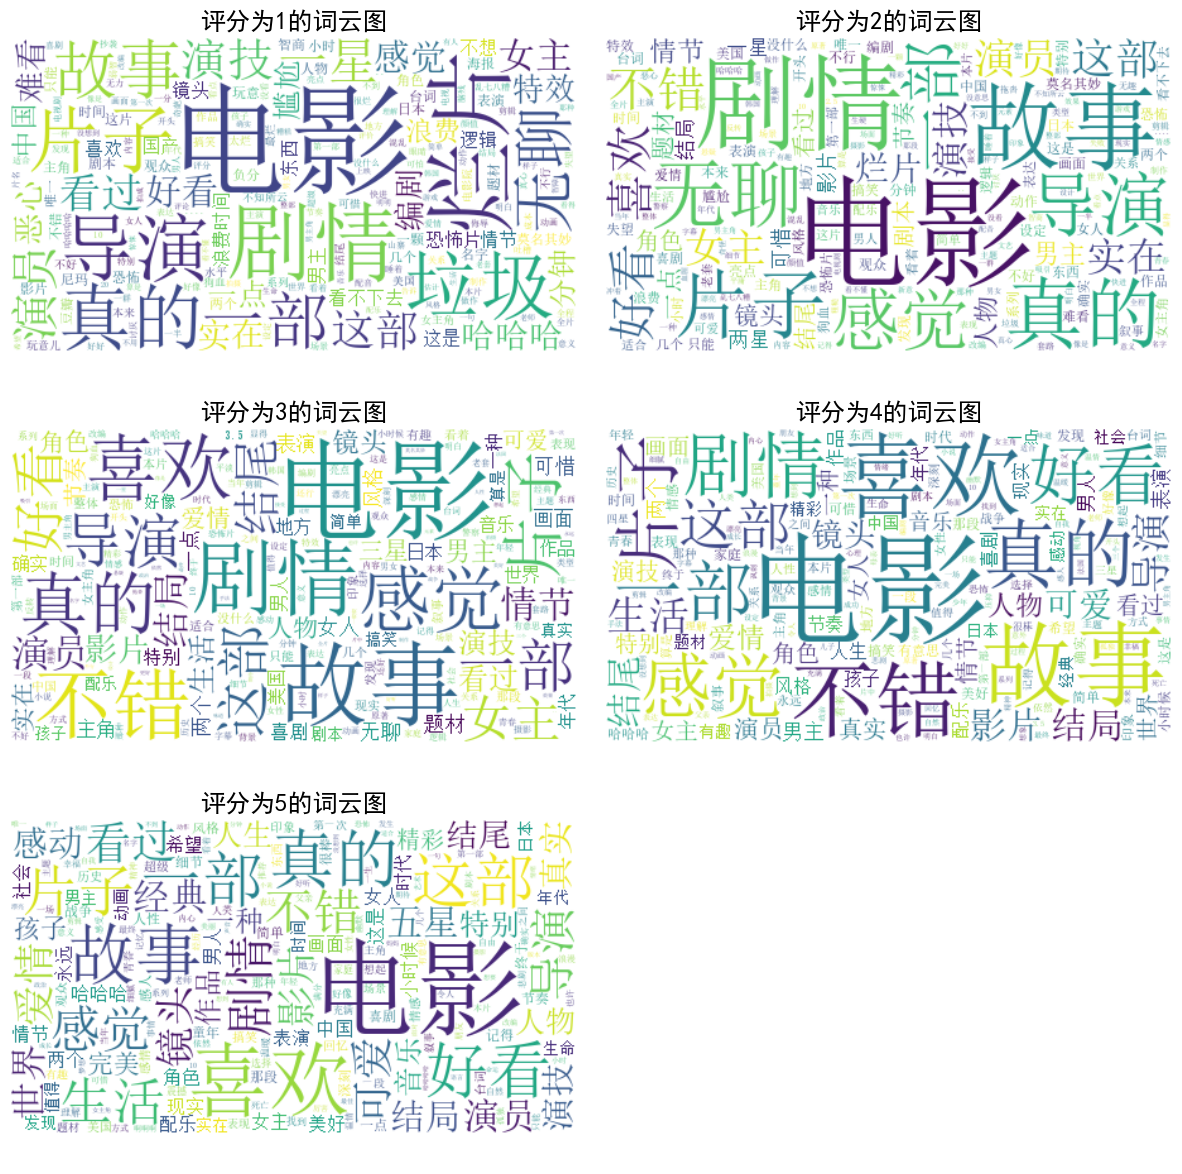

In [ ]:
# 创建一个图形和子图
fig, axes = plt.subplots(3, 2, figsize=(15, 15), gridspec_kw={'wspace': 0.05, 'hspace': 0.05})  # 创建一个 3 行 2 列的子图
axes = axes.flatten()  # 将子图转换为一维数组方便索引

# 循环遍历 RATING 1 到 5
for rating in range(1, 6):
    filtered_content = df_content[df_content['RATING'] == rating]['TOKENIZED_CONTENT']
    
    # 将 TOKENIZED_CONTENT 合并成一个字符串
    text = ' '.join(filtered_content)
    
    # 过滤掉单个字
    filtered_words = [word for word in text.split() if len(word) > 1]  # 只保留长度大于1的词
    
    # 统计词频
    word_counts = Counter(filtered_words)
    
    # 创建词云
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/simsun.ttc',  # 替换为你的字体路径
                          width=450, height=250, background_color='white').generate_from_frequencies(word_counts)
    
    # 在对应的子图上绘制词云
    axes[rating - 1].imshow(wordcloud, interpolation='bilinear')
    axes[rating - 1].axis('off')  # 不显示坐标轴
    axes[rating - 1].set_title(f'评分为{rating}的词云图', fontsize=18)

# 处理最后一个子图为空
axes[5].axis('off')  # 第6个子图为空

# 调整布局
plt.tight_layout()
plt.show()


# 数据读入

In [ ]:
# df_all.to_csv("../../数据集/处理后的数据集/user_data_C4.csv", index=False)

# 用户数据分析

In [2]:
import ast

df_all = pd.read_csv("../../数据集/处理后的数据集/user_data_C4.csv")
# 将存储的字符串值修改成列表形式
df_c = df_all[['ACTORS','DIRECTORS','GENRES','LANGUAGES','REGIONS']].copy()

# 将列中的字符串转换为列表，处理NaN值
df_all['ACTORS'] = df_c['ACTORS'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
df_all['DIRECTORS'] = df_c['DIRECTORS'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
df_all['GENRES'] = df_c['GENRES'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
df_all['REGIONS'] = df_c['REGIONS'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
df_all['LANGUAGES'] = df_c['LANGUAGES'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

df_all

,RATING_ID,USER_MD5,MOVIE_ID,RATING,RATING_TIME,COMMENT_ID,CONTENT,COMMENT_TIME,NAME,ACTORS,DIRECTORS,GENRES,LANGUAGES,REGIONS,TOKENIZED_CONTENT,RATING_HOUR,COMMENT_HOUR
0,1.941952e+09,018b88b05ec053e03acf97920e641115,1291544,5.0,2019-09-06 20:19:04,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,20.0,NaN
1,1.940096e+09,0617937403be10c1b6962686e97198b5,1291544,5.0,2019-09-05 08:44:38,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,8.0,NaN
2,1.941972e+09,08723142276d403448980d73b1eb6e78,1291544,4.0,2019-09-06 20:40:57,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,20.0,NaN
3,1.940079e+09,0ac1940db193217a5351d957ac06e7e1,1291544,4.0,2019-09-05 08:16:52,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,8.0,NaN
4,1.938949e+09,0ae3d72e2c2164f5060b17226b6f5710,1291544,5.0,2019-09-04 10:00:22,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230098,1.917904e+09,8e29154e90cfea1e5a291815a81bdc6f,34782320,3.0,2019-08-20 18:57:42,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,18.0,NaN
4230099,1.920864e+09,a3911cd0925a298a8f6c23fd73240b20,34782320,1.0,2019-08-22 20:44:35,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,20.0,NaN
4230100,1.916191e+09,a8dec3dc19b0a730d99e1affe5bce64f,34782320,1.0,2019-08-19 16:42:50,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,16.0,NaN
4230101,1.915868e+09,c57f355b1b45db04d2a2a1f7f8b5b083,34782320,3.0,2019-08-19 12:47:06,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,12.0,NaN


In [3]:
df_all['CONTENT'] = df_all['CONTENT'].fillna('').astype(str)

# 正则表达式用于提取英文单词（只提取字母组成的单词，忽略标点符号）
def extract_unique_words(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())  # 提取所有字母组成的单词并转换为小写
    words = re.sub(r'http[s]?://\S+', '', text)
    words = re.sub(r'[^\w\s]', '', text)
    return len(words)  # 使用 set 去重后计算单词数量

# 计算 CONTENT 字段的文本长度
df_all['length'] = df_all['CONTENT'].apply(extract_unique_words)

df_sorted = df_all[df_all['length'] > 0]

# 按文本长度从小到大排序
df_sorted = df_sorted[['CONTENT', 'length']].sort_values(by='length', ascending=True)

In [4]:
df_all['COMMENT_TIME'] = pd.to_datetime(df_all['COMMENT_TIME'])
df_all['RATING_TIME'] = pd.to_datetime(df_all['RATING_TIME'])

# 获取 COMMENT_TIME 和 RATING_TIME 列中的最大时间值
latest_comment_time = df_all['COMMENT_TIME'].max()
latest_rating_time = df_all['RATING_TIME'].max()

# 找到这两个时间中最晚的时间
latest_time = max(latest_comment_time, latest_rating_time)

print(f"最晚的时间是: {latest_time}")

最晚的时间是: 2019-09-07 16:00:15


C:\Users\jhc\AppData\Local\Temp\ipykernel_13968\2861352403.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all['RATING_TIME'] = pd.to_datetime(df_all['RATING_TIME'])


In [6]:
df_all['HOUR'] = df_all['RATING_HOUR'].combine_first(df_all['COMMENT_HOUR'])
df_all

,RATING_ID,USER_MD5,MOVIE_ID,RATING,RATING_TIME,COMMENT_ID,CONTENT,COMMENT_TIME,NAME,ACTORS,DIRECTORS,GENRES,LANGUAGES,REGIONS,TOKENIZED_CONTENT,RATING_HOUR,COMMENT_HOUR,length,HOUR
0,1.941952e+09,018b88b05ec053e03acf97920e641115,1291544,5.0,2019-09-06 20:19:04,NaN,,NaT,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,20.0,NaN,0,20.0
1,1.940096e+09,0617937403be10c1b6962686e97198b5,1291544,5.0,2019-09-05 08:44:38,NaN,,NaT,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,8.0,NaN,0,8.0
2,1.941972e+09,08723142276d403448980d73b1eb6e78,1291544,4.0,2019-09-06 20:40:57,NaN,,NaT,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,20.0,NaN,0,20.0
3,1.940079e+09,0ac1940db193217a5351d957ac06e7e1,1291544,4.0,2019-09-05 08:16:52,NaN,,NaT,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,8.0,NaN,0,8.0
4,1.938949e+09,0ae3d72e2c2164f5060b17226b6f5710,1291544,5.0,2019-09-04 10:00:22,NaN,,NaT,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,10.0,NaN,0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230098,1.917904e+09,8e29154e90cfea1e5a291815a81bdc6f,34782320,3.0,2019-08-20 18:57:42,NaN,,NaT,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,18.0,NaN,0,18.0
4230099,1.920864e+09,a3911cd0925a298a8f6c23fd73240b20,34782320,1.0,2019-08-22 20:44:35,NaN,,NaT,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,20.0,NaN,0,20.0
4230100,1.916191e+09,a8dec3dc19b0a730d99e1affe5bce64f,34782320,1.0,2019-08-19 16:42:50,NaN,,NaT,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,16.0,NaN,0,16.0
4230101,1.915868e+09,c57f355b1b45db04d2a2a1f7f8b5b083,34782320,3.0,2019-08-19 12:47:06,NaN,,NaT,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,12.0,NaN,0,12.0


In [7]:
# 初始化统计结果
results = {}

# 循环遍历数据
for index, row in df_all.iterrows():
    user = row['USER_MD5']
    hour = row['HOUR']
    
    # 根据 HOUR 列的值决定范围
    if 6 <= hour <= 17:
        time_range = '6-17'
    else:
        time_range = '18-5'

    # 更新结果
    if user not in results:
        results[user] = {'6-17': {'RATING_COUNT': 0, 'COMMENT_COUNT': 0},
                         '18-5': {'RATING_COUNT': 0, 'COMMENT_COUNT': 0}}

    results[user][time_range]['RATING_COUNT'] += 1
    results[user][time_range]['COMMENT_COUNT'] += 1

# 转换结果为 DataFrame
result_df = pd.DataFrame.from_dict({(user, time_range): data
                                     for user, time_data in results.items()
                                     for time_range, data in time_data.items()},
                                    orient='index').reset_index()

result_df.columns = ['USER_MD5', 'HOUR_GROUP', 'RATING_COUNT', 'COMMENT_COUNT']

print(result_df)

                                 USER_MD5 HOUR_GROUP  RATING_COUNT  \
0        018b88b05ec053e03acf97920e641115       6-17             6   
1        018b88b05ec053e03acf97920e641115       18-5             5   
2        0617937403be10c1b6962686e97198b5       6-17             1   
3        0617937403be10c1b6962686e97198b5       18-5             0   
4        08723142276d403448980d73b1eb6e78       6-17             0   
...                                   ...        ...           ...   
1218707  d7a5761fb3b7bf67764b524c35e9ddac       18-5             1   
1218708  099c793870cfc8009ff70dace6eedd31       6-17             0   
1218709  099c793870cfc8009ff70dace6eedd31       18-5             1   
1218710  05c9f0ca9688112927f530b4f0443a41       6-17             0   
1218711  05c9f0ca9688112927f530b4f0443a41       18-5             1   

         COMMENT_COUNT  
0                    6  
1                    5  
2                    1  
3                    0  
4                    0  
...      

In [20]:
result_df['COUNT'] = result_df['RATING_COUNT'] + result_df['COMMENT_COUNT']
# 计算每个用户的总评价数量
total_counts = result_df.groupby('USER_MD5')['COUNT'].sum().reset_index()
total_counts.columns = ['USER_MD5', 'TOTAL_COUNT']
total_counts = total_counts[total_counts['TOTAL_COUNT'] >= 5]

# 合并计算的总数到原结果
df_result = pd.merge(result_df, total_counts, on='USER_MD5')

# 计算占比
df_result['PERCENTAGE'] = (df_result['COUNT'] / df_result['TOTAL_COUNT'])

# # 可以选择只保留需要的列
# final_result = result_df[['USER_MD5', 'HOUR_GROUP', 'RATING_COUNT', 'COMMENT_COUNT', 'RATING_PERCENTAGE', 'COMMENT_PERCENTAGE']]
df_result

,USER_MD5,HOUR_GROUP,RATING_COUNT,COMMENT_COUNT,COUNT,TOTAL_COUNT,PERCENTAGE
0,018b88b05ec053e03acf97920e641115,6-17,6,6,12,22,0.545455
1,018b88b05ec053e03acf97920e641115,18-5,5,5,10,22,0.454545
2,0ac1940db193217a5351d957ac06e7e1,6-17,1,1,2,6,0.333333
3,0ac1940db193217a5351d957ac06e7e1,18-5,2,2,4,6,0.666667
4,0df928358fe90b506fa6535256189a75,6-17,3,3,6,14,0.428571
...,...,...,...,...,...,...,...
405861,db163a337310a41f8a03ecfb294cb0f3,18-5,0,0,0,8,0.000000
405862,a601fd1c238b3334e7e3aa628fd8f0b9,6-17,0,0,0,6,0.000000
405863,a601fd1c238b3334e7e3aa628fd8f0b9,18-5,3,3,6,6,1.000000
405864,ad6d9e75280960d1707fe590a97a2804,6-17,1,1,2,6,0.333333


In [53]:
# 使用 pivot 方法重新设置 DataFrame
df_pivot = df_result.pivot(index='USER_MD5', columns='HOUR_GROUP', values='PERCENTAGE').reset_index()

# 重命名列
df_pivot.columns.name = None  # 去掉列名
df_pivot = df_pivot.rename(columns={'6-17': '6-17', '18-5': '18-5'})

# 如果需要填充缺失值，可以选择填充为 0 或其它值
df_pivot.fillna(0, inplace=True)
df_pivot

,USER_MD5,18-5,6-17
0,00000d431c3ef737f7a2cc7d3cf2540a,0.700000,0.300000
1,00008ef628c42d8089253c0906804c7e,0.722222,0.277778
2,0000907ad9784ed6c758550e6e443e4d,0.333333,0.666667
3,00010a591926fbadcab3fabd751ddb40,0.818182,0.181818
4,0001773246f25b3c7ab97ce05af9dafa,0.285714,0.714286
...,...,...,...
202928,fffe604642dde8d18e7a001664cc39d5,0.600000,0.400000
202929,fffe7273a798ac1bd6733404c2e545ba,0.000000,1.000000
202930,ffff5bb919b23a534bf9858f64d1d4b7,0.500000,0.500000
202931,ffff66342d284e19b75ab76390268d74,0.500000,0.500000


In [62]:
df_pivot['minus'] = df_pivot['6-17'] - df_pivot['18-5']
df_pivot

,USER_MD5,18-5,6-17,minus
0,00000d431c3ef737f7a2cc7d3cf2540a,0.700000,0.300000,-0.400000
1,00008ef628c42d8089253c0906804c7e,0.722222,0.277778,-0.444444
2,0000907ad9784ed6c758550e6e443e4d,0.333333,0.666667,0.333333
3,00010a591926fbadcab3fabd751ddb40,0.818182,0.181818,-0.636364
4,0001773246f25b3c7ab97ce05af9dafa,0.285714,0.714286,0.428571
...,...,...,...,...
202928,fffe604642dde8d18e7a001664cc39d5,0.600000,0.400000,-0.200000
202929,fffe7273a798ac1bd6733404c2e545ba,0.000000,1.000000,1.000000
202930,ffff5bb919b23a534bf9858f64d1d4b7,0.500000,0.500000,0.000000
202931,ffff66342d284e19b75ab76390268d74,0.500000,0.500000,0.000000


In [40]:
count = df_result[df_result['HOUR_GROUP'] == '6-17'][['USER_MD5','PERCENTAGE']]
count['PERCENTAGE'] = 1 - count['PERCENTAGE'] * 2
def classify_percentage(row):
    if row['PERCENTAGE'] < -0.25:
        return '晨间型'
    elif row['PERCENTAGE'] > 0.25:
        return '夜间型'
    else:
        return '均衡型'

count['TYPE'] = count.apply(classify_percentage, axis=1)

In [52]:
count[count['USER_MD5'] == '27a0515251ae7b335fc40a6a01ba34c3']

,USER_MD5,PERCENTAGE,TYPE
626,27a0515251ae7b335fc40a6a01ba34c3,-0.453393,晨间型


In [ ]:
user_mapping = {
    'b05ae0036abc8f113d7e491f502a7fa8': 1,
    '535e6f7ef1626bedd166e4dfa49bc0b4': 2,
    '425889580eb67241e5ebcd9f9ae8a465': 3,
    '3917c1b1b030c6d249e1a798b3154c43': 4,
    '27a0515251ae7b335fc40a6a01ba34c3': 5,
}

## 电影评价数量

### 测试
对同一部电影评分超过两次的只出现了三种情况，忽略不计

In [ ]:
# result = df_all.groupby(['USER_MD5', 'MOVIE_ID', 'NAME']).size().reset_index(name='count')
# result[result['count']>1]

,USER_MD5,MOVIE_ID,NAME,count
1602838,60e453d46211dcb1606edaf15ed3b7d3,3264844,陈毅市长,2
3193601,c2e4ebabd45e4ac95cece043425c55e3,1309088,活死人黎明,2
3209719,c3e59388cab3aee3feff9cf8d5492fe0,30299356,友情以上,2


In [ ]:
# df_all[(df_all['USER_MD5'] == 'c3e59388cab3aee3feff9cf8d5492fe0') & (df_all['NAME'] == '友情以上')]

,RATING_ID,USER_MD5,MOVIE_ID,RATING,RATING_TIME,COMMENT_ID,CONTENT,NAME,ACTORS,DIRECTORS,GENRES,LANGUAGES,REGIONS,TOKENIZED_CONTENT
2525330,1857934240,c3e59388cab3aee3feff9cf8d5492fe0,30299356,5,2019-07-13 10:10:24,NaN,NaN,友情以上,"[平采娜·乐维瑟派布恩, 奈哈·西贡索邦, 杰森·杨, 纳塔西特·科蒂马努瓦尼, 朱主爱, ...",[查亚诺普·布恩帕拉科布],"[喜剧, 爱情]",[泰语],[泰国],
4127424,1942819627,c3e59388cab3aee3feff9cf8d5492fe0,30299356,2,2019-09-07 14:14:22,NaN,NaN,友情以上,"[平采娜·乐维瑟派布恩, 奈哈·西贡索邦, 杰森·杨, 纳塔西特·科蒂马努瓦尼, 朱主爱, ...",[查亚诺普·布恩帕拉科布],"[喜剧, 爱情]",[泰语],[泰国],


### 电影评分

In [33]:
# 确保 COMMENT_TIME 和 RATING_TIME 列是日期时间格式
df_all['COMMENT_TIME'] = pd.to_datetime(df_all['COMMENT_TIME'], errors='coerce')
df_all['RATING_TIME'] = pd.to_datetime(df_all['RATING_TIME'], errors='coerce')

# 先根据 USER_MD5 分组，统计 RATING_ID 的去重数量
result = df_all.groupby('USER_MD5').agg({
    'RATING_ID': 'nunique',  # 统计 RATING_ID 的去重数量
}).reset_index()

# 过滤 COMMENT_ID 统计时，去除长度小于等于 3 的行
df_filtered = df_all[df_all['length'] > 3]

# 根据 USER_MD5 分组，统计 COMMENT_ID 的去重数量，限制 COMMENT 长度大于 3
comment_count = df_filtered.groupby('USER_MD5').agg({
    'COMMENT_ID': 'nunique',  # 统计 COMMENT_ID 的去重数量
}).reset_index()

# 合并 RATING_ID 和 COMMENT_ID 的统计结果
result = result.merge(comment_count, on='USER_MD5', how='left')

# 重命名列
result.columns = ['USER_MD5', 'RATING_ID_COUNT', 'COMMENT_ID_COUNT']

# 将 COMMENT_ID_COUNT 中的 NaN 值替换为 0
result['COMMENT_ID_COUNT'] = result['COMMENT_ID_COUNT'].fillna(0)

# 转换 COMMENT_ID_COUNT 列为整数类型
result['COMMENT_ID_COUNT'] = result['COMMENT_ID_COUNT'].astype(int)

# 提取每个用户的最早 COMMENT_TIME 和 RATING_TIME
earliest_times = df_all.groupby('USER_MD5').agg({
    'COMMENT_TIME': 'min',  # 获取最早的 COMMENT_TIME
    'RATING_TIME': 'min'    # 获取最早的 RATING_TIME
}).reset_index()

# 合并最早的时间到 result 中
result = result.merge(earliest_times, on='USER_MD5', how='left')

# 将 COMMENT_TIME 和 RATING_TIME 列的时间合并为更早的那个值
result['EARLIEST_TIME'] = result[['COMMENT_TIME', 'RATING_TIME']].min(axis=1)

# 格式化 EARLIEST_TIME 为 'YYYY-MM'
result['EARLIEST_TIME'] = result['EARLIEST_TIME'].dt.strftime('%Y-%m')

# 删除原始的 COMMENT_TIME 和 RATING_TIME 列
result = result.drop(columns=['COMMENT_TIME', 'RATING_TIME'])

# 重命名列
result.columns = ['USER_MD5', 'RATING_ID_COUNT', 'COMMENT_ID_COUNT', 'EARLIEST_TIME']

# 按 RATING_ID_COUNT 和 COMMENT_ID_COUNT 降序排列
result = result.sort_values(by=['RATING_ID_COUNT', 'COMMENT_ID_COUNT'], ascending=False)

# 重置索引
result = result.reset_index(drop=True)

result = result[(result['RATING_ID_COUNT'] != 0) | (result['COMMENT_ID_COUNT'] != 0)]

result['RC_COUNT'] = result['COMMENT_ID_COUNT'] + result['RATING_ID_COUNT']

# 先确保 EARLIEST_TIME 列是日期类型（如果是字符串形式，先转回为 datetime）
result['EARLIEST_TIME2'] = pd.to_datetime(result['EARLIEST_TIME'], format='%Y-%m')

# 定义2019年9月1日
reference_date = pd.to_datetime('2019-09-01')

# 计算 EARLIEST_TIME 到 2019年9月之间的月份差
result['MONTHS_SINCE_2019_09'] = -((result['EARLIEST_TIME2'].dt.year - reference_date.year) * 12 + result['EARLIEST_TIME2'].dt.month - reference_date.month)

# 删除原始的 COMMENT_TIME 和 RATING_TIME 列
result = result.drop(columns=['EARLIEST_TIME2'])

result['monthly_COUNT'] = result['RC_COUNT'] / result['MONTHS_SINCE_2019_09']

# 显示结果
print(result)

                                USER_MD5  RATING_ID_COUNT  COMMENT_ID_COUNT  \
0       535e6f7ef1626bedd166e4dfa49bc0b4             4339               976   
1       3917c1b1b030c6d249e1a798b3154c43             4292               772   
2       425889580eb67241e5ebcd9f9ae8a465             4107              1012   
3       dbb091c39a912a521a0849224bb8fdb9             3323               664   
4       b076f6c5d5aa95d016a9597ee96d4600             3060               794   
...                                  ...              ...               ...   
607880  ffbadabf5bf6a235793d41b50c373742                0                 1   
607881  ffc52f7f19f0b8d4bd8a8908310e06ea                0                 1   
607882  ffd1e10e0fb917ef037f088d3829025a                0                 1   
607883  ffea83585cd46409138f797cab3708f0                0                 1   
607884  fffe67d0b8fc5606c9bdb4a3912529b1                0                 1   

       EARLIEST_TIME  RC_COUNT  MONTHS_SINCE_2019_0

In [34]:
# 过滤掉 inf 和 -inf
result = result[np.isfinite(result['monthly_COUNT'])]

# # 获取数据的最小值和最大值
# min_val = result['monthly_COUNT'].min()
# max_val = result['monthly_COUNT'].max()

# 设定区间的宽度（这里以 1.0 为例）
bin_width = 1.0
bins = np.arange(1, 650, 5)

# 使用 pd.cut 分箱
result['count_bin'] = pd.cut(result['monthly_COUNT'], bins=bins, right=False)

# 将大于 100 的值归为 ">100"
result['count_bin'] = result['count_bin'].apply(lambda x: '>26' if x.right > 26 else str(x))

# 按区间统计每个区间的频数
bin_counts = result['count_bin'].value_counts().sort_index()

# 输出表格
print(bin_counts)

count_bin
>26           276
[1, 6)      75075
[11, 16)      830
[16, 21)      298
[21, 26)      156
[6, 11)      3360
Name: count, dtype: int64


In [25]:
result['monthly_COUNT'].max()

647.8

### 打点

### 区间绘图

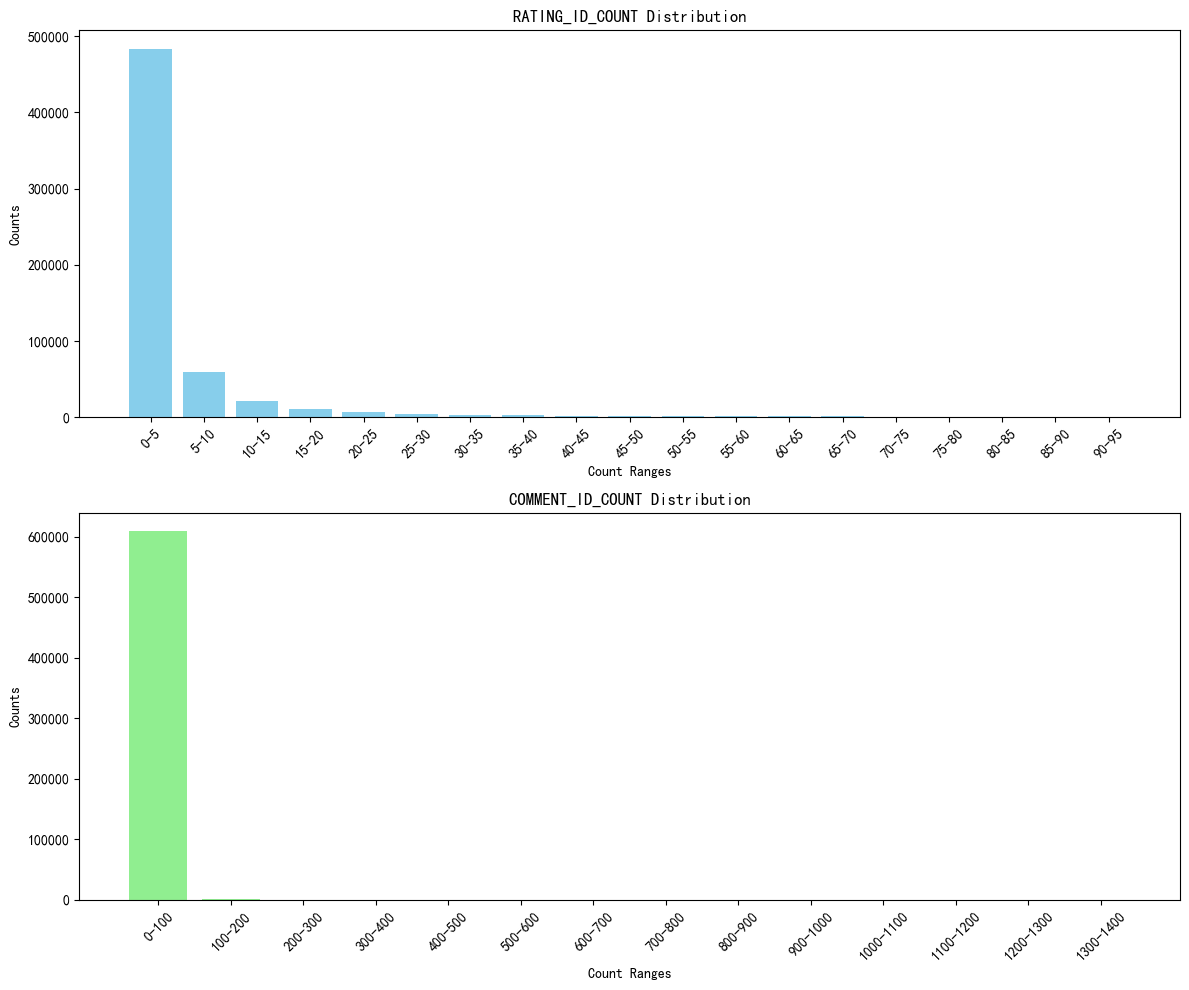

In [124]:
# 定义 RATING_ID_COUNT 的区间
rating_bins = np.arange(0, 100, 5)  # 从0到5000，每500为一个区间
rating_labels = [f'{rating_bins[i]}-{rating_bins[i+1]}' for i in range(len(rating_bins) - 1)]

# 定义 COMMENT_ID_COUNT 的区间，自定义适合的范围
comment_bins = np.arange(0, 1500, 100)  # 你可以根据 COMMENT_ID_COUNT 的范围调整
comment_labels = [f'{comment_bins[i]}-{comment_bins[i+1]}' for i in range(len(comment_bins) - 1)]

# 统计在 RATING_ID_COUNT 区间内的数量
rating_counts = pd.cut(result['RATING_ID_COUNT'], bins=rating_bins,labels=rating_labels,right=False).value_counts().reindex(rating_labels, fill_value=0)

# 统计在 COMMENT_ID_COUNT 区间内的数量
comment_counts = pd.cut(result['COMMENT_ID_COUNT'], bins=comment_bins,labels=comment_labels,right=False).value_counts().reindex(comment_labels, fill_value=0)

# 创建上下排列的柱状图
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# 绘制 RATING_ID_COUNT 的柱状图
axs[0].bar(rating_labels, rating_counts, color='skyblue')
axs[0].set_title('RATING_ID_COUNT Distribution')
axs[0].set_xlabel('Count Ranges')
axs[0].set_ylabel('Counts')
axs[0].tick_params(axis='x', rotation=45)

# 绘制 COMMENT_ID_COUNT 的柱状图
axs[1].bar(comment_labels, comment_counts, color='lightgreen')
axs[1].set_title('COMMENT_ID_COUNT Distribution')
axs[1].set_xlabel('Count Ranges')
axs[1].set_ylabel('Counts')
axs[1].tick_params(axis='x', rotation=45)

# 调整布局
plt.tight_layout()
plt.show()

In [69]:
pd.cut(result['RATING_ID_COUNT'], bins=rating_bins,labels=rating_labels,right=False).value_counts().reindex(rating_labels, fill_value=0)

RATING_ID_COUNT
0-5      483623
5-10      59576
10-15     21194
15-20     11199
20-25      6700
25-30      4537
30-35      3323
35-40      2483
40-45      1942
45-50      1623
50-55      1350
55-60      1141
60-65       943
65-70       852
70-75       752
75-80       595
80-85       513
85-90       458
90-95       427
Name: count, dtype: int64

In [59]:
result['RATING_ID_COUNT'].value_counts()

RATING_ID_COUNT
1       309741
2        90266
3        46009
4        28595
5        19432
         ...  
757          1
486          1
751          1
750          1
4339         1
Name: count, Length: 867, dtype: int64

In [6]:
result['RATING_ID_COUNT'].describe()

count    607885.000000
mean          6.858251
std          37.566883
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        4339.000000
Name: RATING_ID_COUNT, dtype: float64

In [7]:
result['COMMENT_ID_COUNT'].describe()

count    607885.000000
mean          1.612254
std           8.850476
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        1012.000000
Name: COMMENT_ID_COUNT, dtype: float64

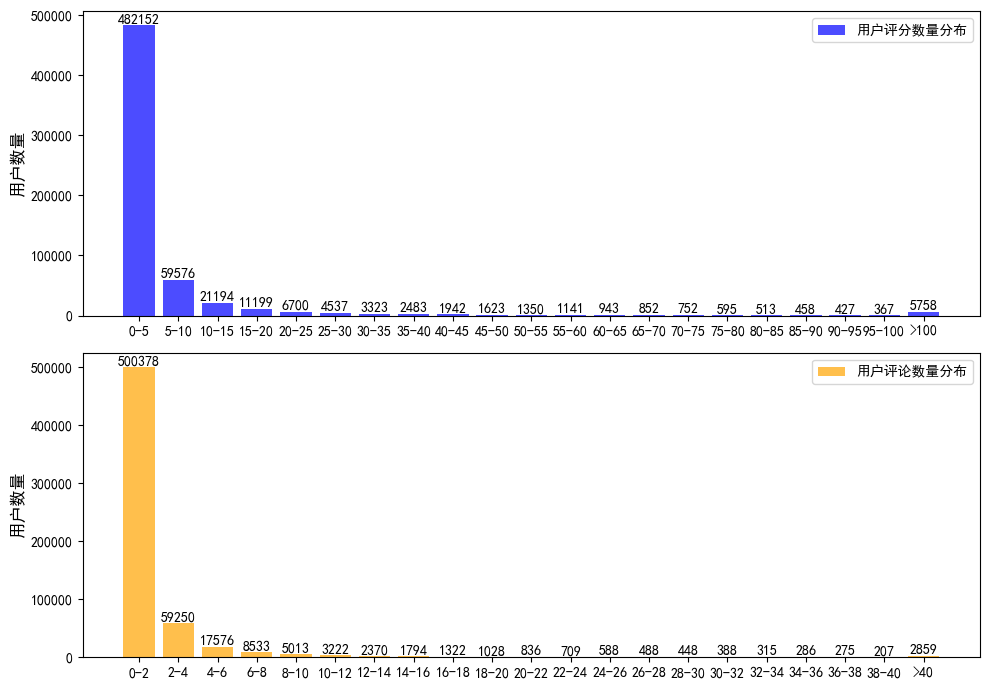

In [133]:
# 先合并 RATING_ID_COUNT 和 COMMENT_ID_COUNT
data = pd.concat([result['RATING_ID_COUNT'], result['COMMENT_ID_COUNT']], axis=1)
data.columns = ['RATING_ID_COUNT', 'COMMENT_ID_COUNT']

# 为 RATING_ID_COUNT 定义区间（0-100），大于100的归为一个区间
rating_bins = list(range(0, 105, 5))  # 0到100以5为单位，105表示大于100的边界
rating_bins.append(np.inf)  # 添加无穷大，表示大于100的区间

# 为 COMMENT_ID_COUNT 定义不同的区间（0-50），大于50的归为一个区间
comment_bins = list(range(0, 42, 2))  # 0到50以5为单位，55表示大于50的边界
comment_bins.append(np.inf)  # 添加无穷大，表示大于50的区间

# 根据 bins 生成对应标签
labels = ['{}-{}'.format(i, i + 5) for i in range(0, 100, 5)] + ['>100']  # 这里的标签适用于 RATING_ID_COUNT
comment_labels = ['{}-{}'.format(i, i + 2) for i in range(0, 40, 2)] + ['>40']  # 适用于 COMMENT_ID_COUNT

# 计算每个字段的分布
data['RATING_BIN'] = pd.cut(data['RATING_ID_COUNT'], bins=rating_bins, labels=labels, right=False)
data['COMMENT_BIN'] = pd.cut(data['COMMENT_ID_COUNT'], bins=comment_bins, labels=comment_labels, right=False)

# 统计频率
rating_hist = data['RATING_BIN'].value_counts().sort_index()
comment_hist = data['COMMENT_BIN'].value_counts().sort_index()

# 绘制柱状图
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

# 绘制 RATING_ID_COUNT 分布
bars1 = ax1.bar(rating_hist.index.astype(str), rating_hist.values, color='blue', alpha=0.7, label='用户评分数量分布')
# ax1.set_title('RATING_ID_COUNT Distribution')
# ax1.set_xlabel('Bins')
ax1.set_ylabel('用户数量',fontsize=12)
ax1.legend()

# 在柱状图上添加标签
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, str(int(yval)), ha='center', va='bottom', fontsize=10)

# 设置 RATING_ID_COUNT 子图的横坐标
ax1.set_xticks(rating_hist.index.astype(str))  # 设置横坐标为区间标签
ax1.set_xticklabels(rating_hist.index.astype(str))  # 设置标签旋转

# 绘制 COMMENT_ID_COUNT 分布
bars2 = ax2.bar(comment_hist.index.astype(str), comment_hist.values, color='orange', alpha=0.7, label='用户评论数量分布')
# ax2.set_title('COMMENT_ID_COUNT Distribution')
# ax2.set_xlabel('Bins')
ax2.set_ylabel('用户数量',fontsize=12)
ax2.legend()

# 在柱状图上添加标签
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, str(int(yval)), ha='center', va='bottom', fontsize=10)

# 设置 COMMENT_ID_COUNT 子图的横坐标
ax2.set_xticks(comment_hist.index.astype(str))  # 设置横坐标为区间标签
ax2.set_xticklabels(comment_hist.index.astype(str))  # 设置标签旋转

# 调整布局
plt.tight_layout()
plt.show()

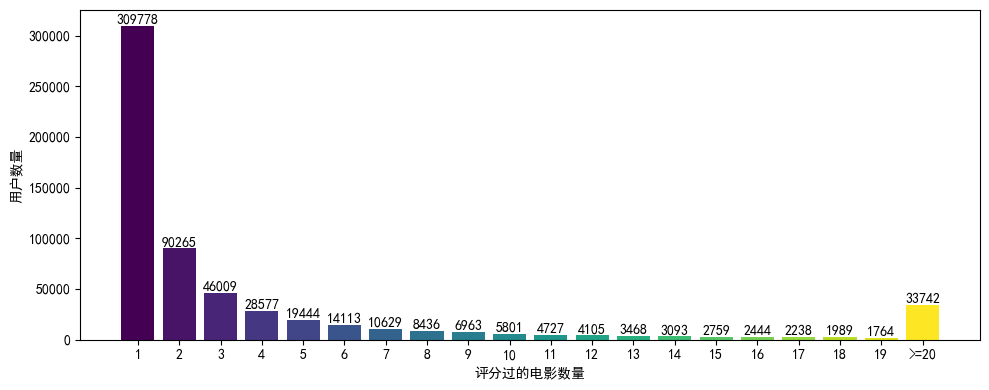

In [122]:
# 按区间分组，设置区间大小为5
bins = list(range(1, 21, 1))  # 包含0到20的区间
bins.append(float('inf'))  # 添加一个无限大的区间
labels = [f"{bins[i]}" for i in range(len(bins) - 2)] + [">=20"]

# 将电影数量分组到区间中
result['区间'] = pd.cut(result['电影数量'], bins=bins, labels=labels, right=False)

# 统计每个区间内的用户数量
user_counts = result['区间'].value_counts().reindex(labels, fill_value=0)

# 定义颜色列表（可以根据需要调整）
colors = plt.cm.viridis(np.linspace(0, 1, len(user_counts)))

# 绘制柱状图
plt.figure(figsize=(10, 4))
bars = plt.bar(user_counts.index, user_counts.values, color=colors)

# 添加数据标签
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# plt.title('不同电影数量区间的用户数量')
plt.xlabel('评分过的电影数量')
plt.ylabel('用户数量')
plt.xticks()
# plt.grid(axis='y')

plt.tight_layout()

# 显示图形
plt.show()

### 用户评价涉及的类型广度

In [26]:
# 首先按照 'USER_MD5' 分组，然后将每个用户的 GENRES 列中的所有列表合并
df_all['GENRES_unique'] = df_all['GENRES'].apply(lambda x: set(x))  # 去重每行中的元素

# 按照 'USER_MD5' 分组，对每个用户的 GENRES 列中的去重类型进行合并（并去重）
user_genre_count = df_all.groupby('USER_MD5')['GENRES_unique'].apply(lambda x: set([item for sublist in x for item in sublist])).reset_index()

# 计算每个用户去重后的类型数量
user_genre_count['GENRES_COUNT'] = user_genre_count['GENRES_unique'].apply(len)

In [35]:
user_genre_count

,USER_MD5,GENRES_unique,GENRES_COUNT,GENRES_COUNT_BINS
0,00000d431c3ef737f7a2cc7d3cf2540a,"{动作, 西部, 战争, 恐怖, 传记, 喜剧, 音乐, 悬疑, 历史, 惊悚, 犯罪, 剧...",13,13
1,00008d9fd119a18338f700e9f6b018d3,"{喜剧, 剧情, 爱情}",3,3
2,00008ef628c42d8089253c0906804c7e,"{家庭, 喜剧, 传记, 奇幻, 悬疑, 犯罪, 剧情, 同性, 爱情}",9,9
3,0000907ad9784ed6c758550e6e443e4d,"{西部, 动画, 战争, 喜剧, 剧情, 冒险}",6,6
4,00009ed66bc8a8a867b7887ccedabba4,{喜剧},1,1
...,...,...,...,...
609351,ffff5bb919b23a534bf9858f64d1d4b7,"{惊悚, 恐怖, 悬疑}",3,3
609352,ffff66342d284e19b75ab76390268d74,"{喜剧, 恐怖, 动画, 爱情}",4,4
609353,ffff875dc090c1109b3d37ce5b114075,{剧情},1,1
609354,ffff9498af27bdb06c3e61452758fba5,"{动画, 喜剧, 音乐, 悬疑, 歌舞, 动作, 剧情, 爱情}",8,8


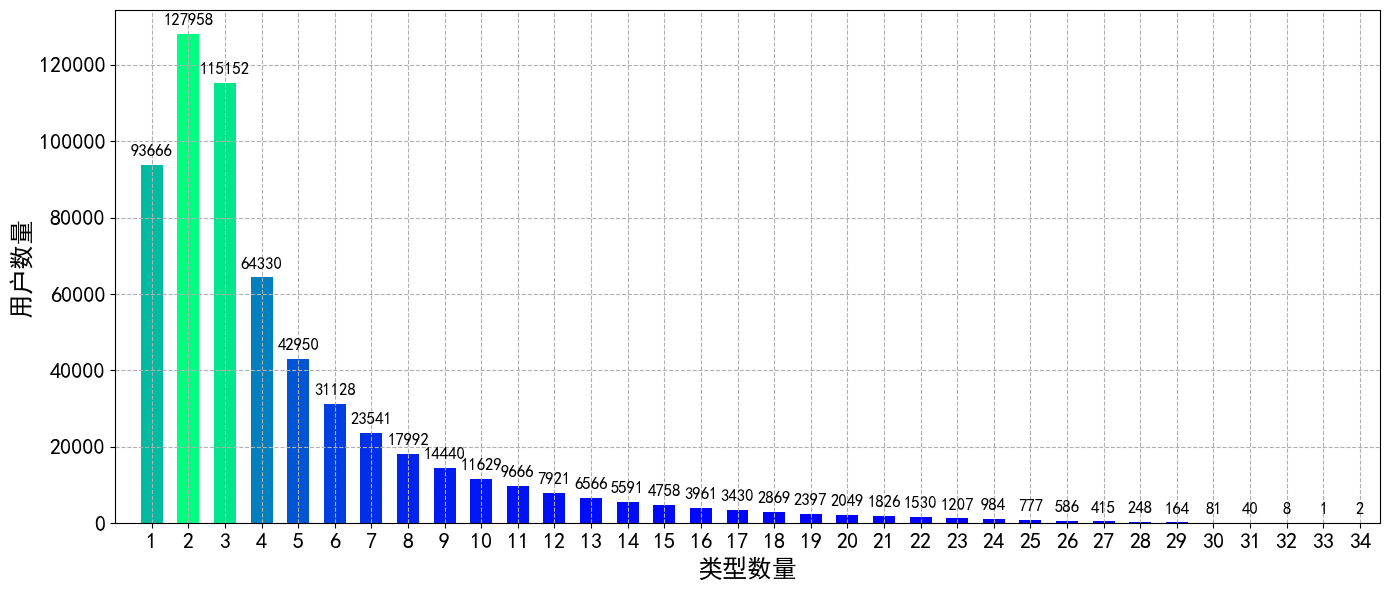

In [36]:
from matplotlib import cm
from matplotlib.colors import Normalize

# 使用 np.arange 来生成区间范围
bins = np.arange(1, 36, 1)  # +step 是为了确保包含 stop 值

# 创建标签，标签的数量要比区间数少一个，因为 bins 会有一个额外的右端点
labels = [f'{bins[i]}' for i in range(len(bins) - 1)]

# 使用 cut() 将 GENRES_COUNT 列的值划分到这些区间
user_genre_count['GENRES_COUNT_BINS'] = pd.cut(user_genre_count['GENRES_COUNT'], bins=bins, labels=labels, right=False)

# 统计每个区间内的用户数量
bin_counts = user_genre_count['GENRES_COUNT_BINS'].value_counts().sort_index()

# 设置渐变色
norm = Normalize(vmin=bin_counts.min(), vmax=bin_counts.max())  # 归一化
cmap = cm.get_cmap('winter')  # 使用 'coolwarm' 色图（你也可以选择其他色图）

# 绘制柱状图
plt.figure(figsize=(14, 6))
ax = bin_counts.plot(kind='bar', color=[cmap(norm(val)) for val in bin_counts], width=0.6)
# plt.title('Number of Users in Each Genre Count Interval')
plt.xlabel('类型数量', fontsize=18)
plt.ylabel('用户数量', fontsize=18)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(left=-1)

# 在每个柱子上添加数值标签
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 5),  # Offset the label slightly above the bar
                textcoords='offset points',
                ha='center', va='bottom', fontsize=12)


plt.grid(linestyle="--")  # 设置背景网格线为虚线
plt.tight_layout()

# 显示图形
plt.show()

### 基于熵权法的topsis评价方法

In [37]:
result = result.merge(user_genre_count[['USER_MD5', 'GENRES_COUNT']], on='USER_MD5', how='left')
result

,USER_MD5,RATING_ID_COUNT,COMMENT_ID_COUNT,EARLIEST_TIME,RC_COUNT,MONTHS_SINCE_2019_09,monthly_COUNT,count_bin,GENRES_COUNT
0,535e6f7ef1626bedd166e4dfa49bc0b4,4339,976,2008-10,5315,131,40.572519,>26,31
1,3917c1b1b030c6d249e1a798b3154c43,4292,772,2008-08,5064,133,38.075188,>26,31
2,425889580eb67241e5ebcd9f9ae8a465,4107,1012,2006-11,5119,154,33.240260,>26,31
3,dbb091c39a912a521a0849224bb8fdb9,3323,664,2006-04,3987,161,24.763975,"[21, 26)",30
4,b076f6c5d5aa95d016a9597ee96d4600,3060,794,2008-12,3854,129,29.875969,>26,31
...,...,...,...,...,...,...,...,...,...
591744,ffbadabf5bf6a235793d41b50c373742,0,1,2013-07,1,74,0.013514,NaN,1
591745,ffc52f7f19f0b8d4bd8a8908310e06ea,0,1,2019-08,1,1,1.000000,"[1, 6)",2
591746,ffd1e10e0fb917ef037f088d3829025a,0,1,2014-04,1,65,0.015385,NaN,0
591747,ffea83585cd46409138f797cab3708f0,0,1,2011-03,1,102,0.009804,NaN,1


In [38]:
com_user = result[['USER_MD5', 'RATING_ID_COUNT', 'COMMENT_ID_COUNT', 'monthly_COUNT', 'GENRES_COUNT']]
com_user = com_user[(com_user['monthly_COUNT'] >= 1) & (com_user['GENRES_COUNT'] != 0)]
com_user = com_user.reset_index()
com_user = com_user.drop('index', axis=1)
com_user

,USER_MD5,RATING_ID_COUNT,COMMENT_ID_COUNT,monthly_COUNT,GENRES_COUNT
0,535e6f7ef1626bedd166e4dfa49bc0b4,4339,976,40.572519,31
1,3917c1b1b030c6d249e1a798b3154c43,4292,772,38.075188,31
2,425889580eb67241e5ebcd9f9ae8a465,4107,1012,33.240260,31
3,dbb091c39a912a521a0849224bb8fdb9,3323,664,24.763975,30
4,b076f6c5d5aa95d016a9597ee96d4600,3060,794,29.875969,31
...,...,...,...,...,...
79170,f822e4fec222aaf80f9dc99d9e091ece,0,1,1.000000,2
79171,fb0db34ee773a87131ea7a4573893914,0,1,1.000000,2
79172,fd6dadfd697ed91b4e4ca12e1d3e7169,0,1,1.000000,2
79173,fdb7a5c1abd68ea944a0bfb5e35b6ff6,0,1,1.000000,2


In [39]:
test_user = com_user.copy()

# 计算每列的平方和
col_names = ['RATING_ID_COUNT', 'COMMENT_ID_COUNT', 'monthly_COUNT', 'GENRES_COUNT']
for col in col_names:
    # 计算每列的平方和
    col_square_sum = (com_user[col] ** 2).sum()
    # 计算L2范数（开根号后的平方和）
    col_norm = np.sqrt(col_square_sum)
    # 标准化：每个数值除以该列的L2范数
    test_user[col] = test_user[col] / col_norm

# 归一化后，再按列求和
for col in col_names:
    # 计算每列的求和
    col_sum = test_user[col].sum()
    # 每个数值再除以该列的求和
    test_user[col] = test_user[col] / col_sum

w = []
# 计算熵权值
for col in col_names:
    n = test_user[col].shape[0] # 样本数
    k = 1/np.log(n)
    # 计算每列的熵值
    H = -k * (test_user[col] * np.log(test_user[col] + 1e-10)).sum(axis=0)
    d = 1 - H
    w.append(d)

# 求每列的最大值和最小值
Z_plus = []
Z_minus = []
for col in col_names:
    max_Z = test_user[col].max()
    min_Z = test_user[col].min()
    Z_plus.append(max_Z)
    Z_minus.append(min_Z)

# 计算每个评价对象与最优解和最劣解的距离
D_plus = []
D_minus = []
for row in range(test_user[col].shape[0]):
    d_plus = 0
    d_minus = 0
    for col in range(4):
        d_plus = d_plus + w[col] * (Z_plus[col] - test_user[col_names[col]][row]) ** 2
        d_minus = d_minus + w[col] * (Z_minus[col] - test_user[col_names[col]][row]) ** 2
    D_plus.append(np.sqrt(d_plus))
    D_minus.append(np.sqrt(d_minus))
test_user['D_plus'] = D_plus
test_user['D_minus'] = D_minus
test_user['C'] = test_user['D_minus'] / (test_user['D_minus'] + test_user['D_plus'])

w = [0.1607574114275595,
 0.16167972834406108,
 0.04290116313937986,
 0.031310199058935395]

In [40]:
com_user = com_user.merge(test_user[['USER_MD5', 'C']], on='USER_MD5', how='left')
com_user = com_user.sort_values(by='C',ascending=False)
com_user = com_user.reset_index(drop=True)
com_user

,USER_MD5,RATING_ID_COUNT,COMMENT_ID_COUNT,monthly_COUNT,GENRES_COUNT,C
0,b05ae0036abc8f113d7e491f502a7fa8,2511,728,647.800000,29,0.709523
1,535e6f7ef1626bedd166e4dfa49bc0b4,4339,976,40.572519,31,0.640749
2,425889580eb67241e5ebcd9f9ae8a465,4107,1012,33.240260,31,0.635399
3,3917c1b1b030c6d249e1a798b3154c43,4292,772,38.075188,31,0.605287
4,27a0515251ae7b335fc40a6a01ba34c3,2682,338,604.000000,31,0.577249
...,...,...,...,...,...,...
79170,b05fc87d04a2e41c828d2b14ce4714ed,1,0,1.000000,1,0.000142
79171,b045d6cac2e16baf1ea6a8c293b81bb0,1,0,1.000000,1,0.000142
79172,2cbf757add980c60f3dd178fd635fb6d,1,0,1.000000,1,0.000142
79173,2ccde3ca7ad0903ffe9e4a0b4d53d3bb,1,0,1.000000,1,0.000142


In [41]:
num = 0
com_user[num:(num+20)]

,USER_MD5,RATING_ID_COUNT,COMMENT_ID_COUNT,monthly_COUNT,GENRES_COUNT,C
0,b05ae0036abc8f113d7e491f502a7fa8,2511,728,647.800000,29,0.709523
1,535e6f7ef1626bedd166e4dfa49bc0b4,4339,976,40.572519,31,0.640749
2,425889580eb67241e5ebcd9f9ae8a465,4107,1012,33.240260,31,0.635399
3,3917c1b1b030c6d249e1a798b3154c43,4292,772,38.075188,31,0.605287
4,27a0515251ae7b335fc40a6a01ba34c3,2682,338,604.000000,31,0.577249
5,b076f6c5d5aa95d016a9597ee96d4600,3060,794,29.875969,31,0.547144
6,8b9670d7fc6a245bf8265a99f1603c22,2482,636,222.714286,28,0.532300
7,dbb091c39a912a521a0849224bb8fdb9,3323,664,24.763975,30,0.528722
8,16efb83da64e58987d911b76bd49a086,2697,722,58.948276,28,0.515090
9,3c572fea1e378425f98241af8131a229,2849,689,21.975155,28,0.504336


In [45]:
com_user.to_csv("../../数据集/处理后的数据集/user_activative_C4.csv", index=False)

## 用户时间特征分析

In [42]:
df_all = df_all.merge(test_user[['USER_MD5', 'C']], on='USER_MD5', how='left')
df_all['C'].fillna(0, inplace=True)

C:\Users\jhc\AppData\Local\Temp\ipykernel_22976\1669049133.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all['C'].fillna(0, inplace=True)


In [45]:
# 确保时间字段为datetime类型
df_all['COMMENT_TIME'] = pd.to_datetime(df_all['COMMENT_TIME'])
df_all['RATING_TIME'] = pd.to_datetime(df_all['RATING_TIME'])

# 提取小时
df_all['COMMENT_HOUR'] = df_all['COMMENT_TIME'].dt.hour
df_all['RATING_HOUR'] = df_all['RATING_TIME'].dt.hour

# 只保留用户ID为 1, 2, 3, 4, 5 的记录
user_ids = ['b05ae0036abc8f113d7e491f502a7fa8',
             '535e6f7ef1626bedd166e4dfa49bc0b4',
             '425889580eb67241e5ebcd9f9ae8a465',
             '3917c1b1b030c6d249e1a798b3154c43',
              '27a0515251ae7b335fc40a6a01ba34c3']
filtered_df = df_all[df_all['USER_MD5'].isin(user_ids)]

# 统计每小时的评论数量
comment_counts = filtered_df.groupby(['COMMENT_HOUR', 'USER_MD5']).agg(
    COMMENT_COUNT=('COMMENT_ID', lambda x: x.notnull().sum())
).reset_index()

# 统计每小时的评分数量
rating_counts = filtered_df.groupby(['RATING_HOUR', 'USER_MD5']).agg(
    RATING_COUNT=('RATING_ID', lambda x: x.notnull().sum())
).reset_index()

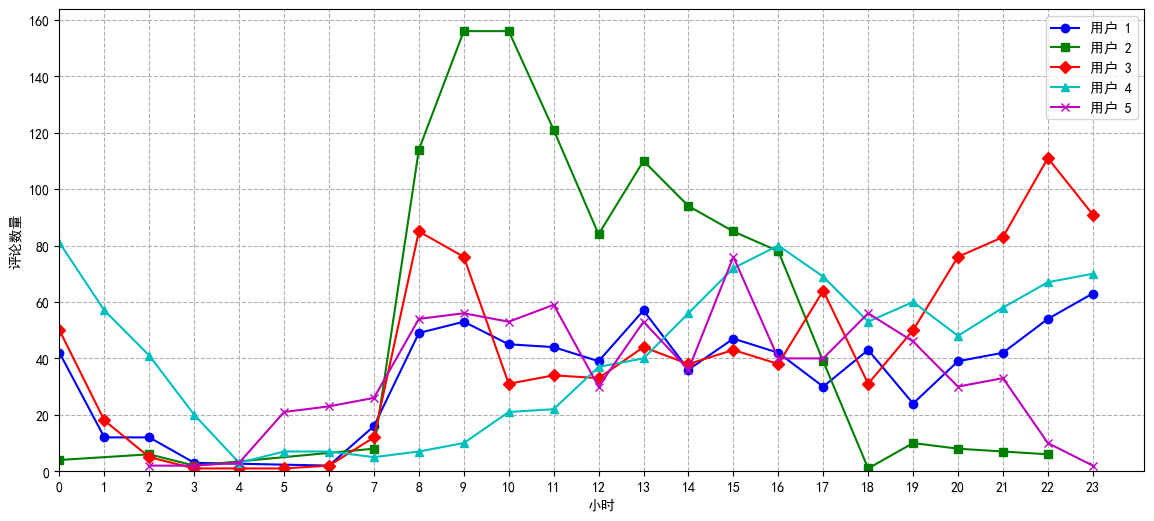

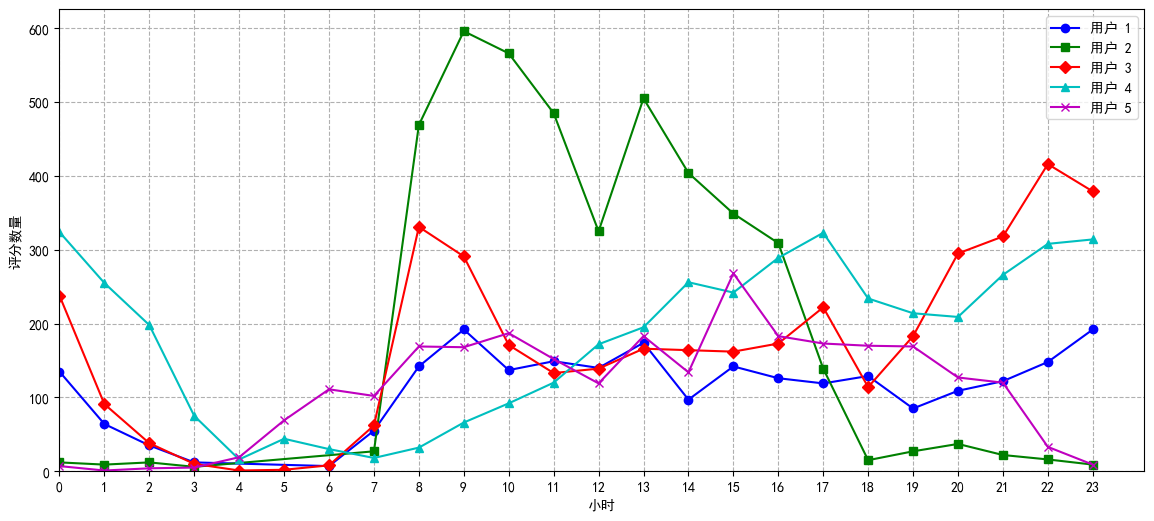

In [54]:
# 用户ID与数字的映射
user_mapping = {
    'b05ae0036abc8f113d7e491f502a7fa8': 1,
    '535e6f7ef1626bedd166e4dfa49bc0b4': 2,
    '425889580eb67241e5ebcd9f9ae8a465': 3,
    '3917c1b1b030c6d249e1a798b3154c43': 4,
    '27a0515251ae7b335fc40a6a01ba34c3': 5,
}

# 定义不同的点样式和颜色
styles = [
    {'marker': 'o', 'color': 'b', 'label': '用户 1'},
    {'marker': 's', 'color': 'g', 'label': '用户 2'},
    {'marker': 'D', 'color': 'r', 'label': '用户 3'},
    {'marker': '^', 'color': 'c', 'label': '用户 4'},
    {'marker': 'x', 'color': 'm', 'label': '用户 5'},
]

# 绘制评论数量的折线图
plt.figure(figsize=(14, 6))
for (user_id, label), style in zip(user_mapping.items(), styles):
    subset = comment_counts[comment_counts['USER_MD5'] == user_id]
    plt.plot(subset['COMMENT_HOUR'], subset['COMMENT_COUNT'], 
             marker=style['marker'], color=style['color'], 
             label=style['label'], linestyle='-' )

# plt.title('活跃度前五的用户的评论数量分布')
plt.xlabel('小时')
plt.ylabel('评论数量')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.xticks(range(24))  # x轴刻度显示0-23小时
plt.legend()
plt.grid(linestyle="--")
plt.show()

# 绘制评分数量的折线图
plt.figure(figsize=(14, 6))
for (user_id, label), style in zip(user_mapping.items(), styles):
    subset = rating_counts[rating_counts['USER_MD5'] == user_id]
    plt.plot(subset['RATING_HOUR'], subset['RATING_COUNT'], 
             marker=style['marker'], color=style['color'], 
             label=style['label'], linestyle='-')

# plt.title('活跃度前五的用户的评分数量分布')
plt.xlabel('小时')
plt.ylabel('评分数量')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.xticks(range(24))  # x轴刻度显示0-23小时
plt.legend()
plt.grid(linestyle="--")
plt.show()


In [44]:
df_all.to_csv("../../数据集/处理后的数据集/user_data_2_C4.csv", index=False)